# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [14]:
# Import essential libraries for data manipulation and analysis

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [15]:
# Importing the file porter_data_1.csv
df = pd.read_csv("/opt/Upgrad/Course2/Delivery_Starter/porter_data_1.csv")

In [16]:
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [17]:
df.describe()

market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  
count  175777.000000  
mean       21.843090  
std         8.748712  
min         0.000000  
25%        15.360000  
50%        21.760000  
75%        28.120000  
max        83.520000

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [20]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at']);
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time']);


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [22]:
# Convert categorical features to category type

df['market_id'] = df['market_id'].astype('category')
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [24]:
# Calculate time taken in minutes

df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [28]:
# Extract the hour and day of week from the 'created_at' timestamp

df['hour'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.day_of_week

# Create a categorical feature 'isWeekend'

df['isWeekend'] = df['day_of_week'].apply(lambda x : 1  if x >=5 else 0)

In [29]:
# convert hour, day_of_week and isWeekend to category

df['hour'] = df['hour'].astype('category')
df['day_of_week'] = df['day_of_week'].astype('category')
df['isWeekend'] = df['isWeekend'].astype('category')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [31]:
# Drop unnecessary columns

df.drop(['created_at', 'actual_delivery_time'], axis=1, inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  category
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        175777 non-null  float64 
 10  total_outstanding_orders  175777 non-null  float64 
 11  distance                  175777 non-null  float64 
 12  time_taken                175777 non-null  float64 
 13  hour                      175

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [33]:
# Define target variable (y) and features (X)

y = df['time_taken']
X = df.drop(['time_taken'], axis=1)

In [34]:
X.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance hour day_of_week  \
0                14.0                      21.0     34.44   22           4   
1                 2.0                       2.0     27.60   21           1   
2                 6.0                      18.0     11.56    0           0   
3                 6.0                       8.0     31.80    3           3   
4                 5.0                       7.0      8.20    2           1   

  isWeekend  
0         0  
1         0  
2         0  
3         0  
4         0

In [35]:
y.head()

0    47.0
1    44.0
2    55.0
3    59.0
4    46.0
Name: time_taken, dtype: float64

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [36]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

In [37]:
print(len(X_train))
print(len(y_train))

140621
140621


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [38]:
# Define numerical and categorical columns for easy EDA and data manipulation

num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes('category').columns.tolist()

In [39]:
print(num_cols)
print(cat_cols)

['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
['market_id', 'store_primary_category', 'order_protocol', 'hour', 'day_of_week', 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

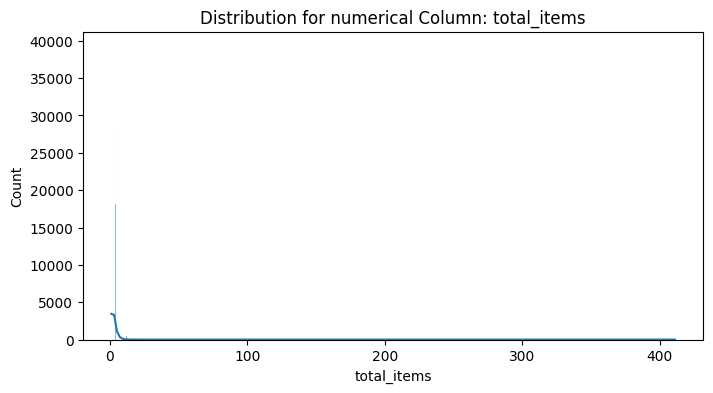

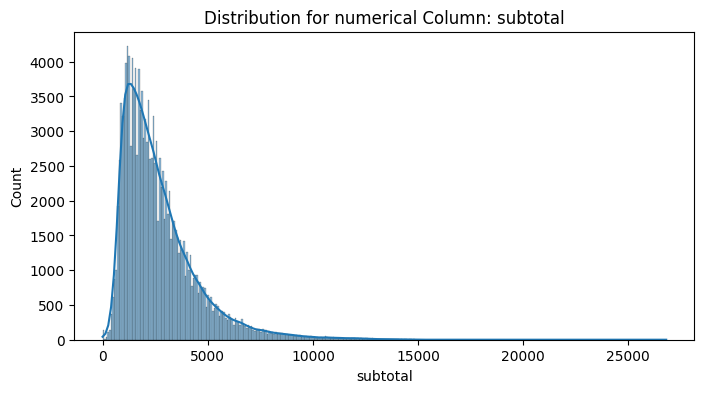

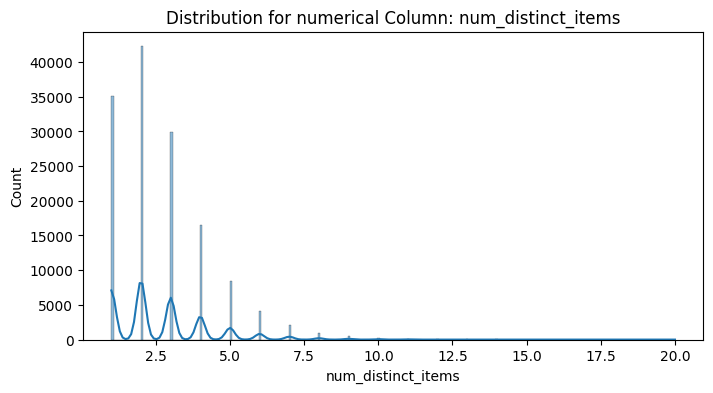

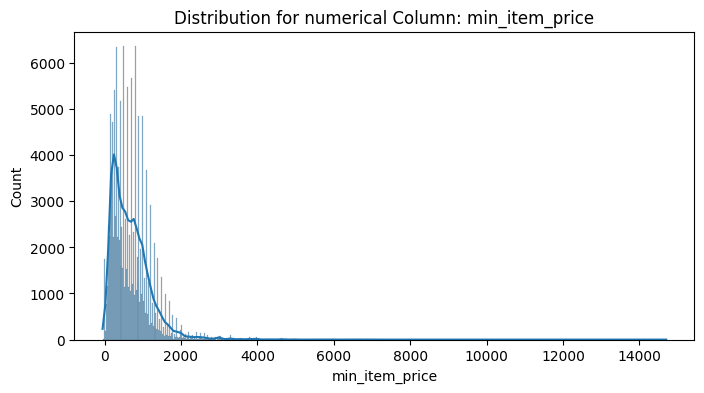

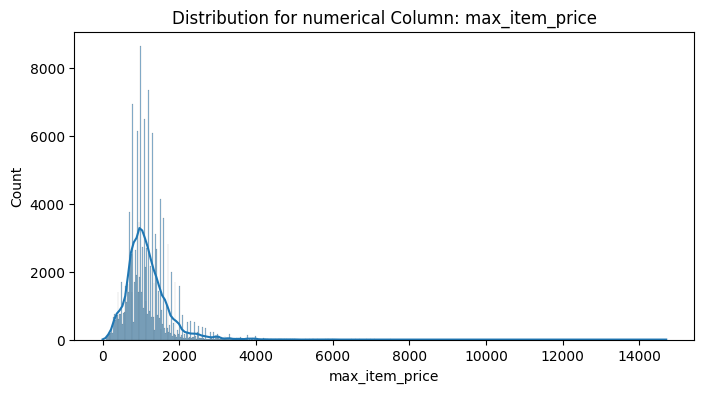

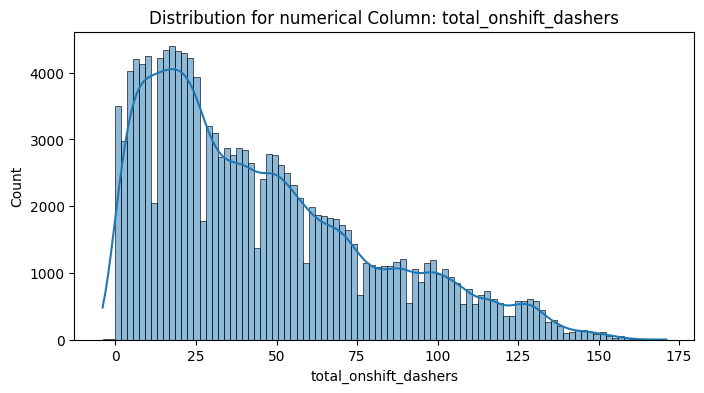

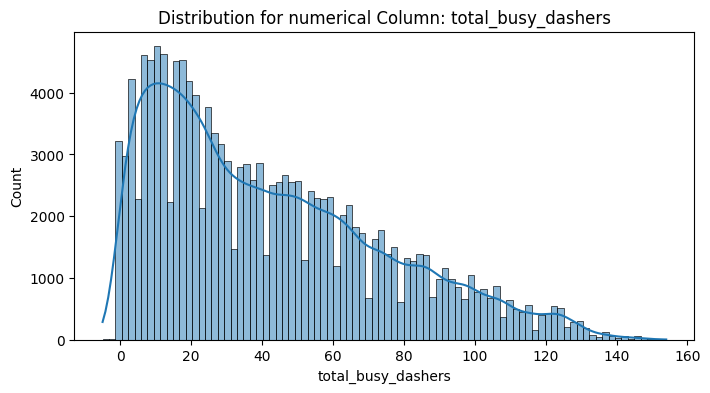

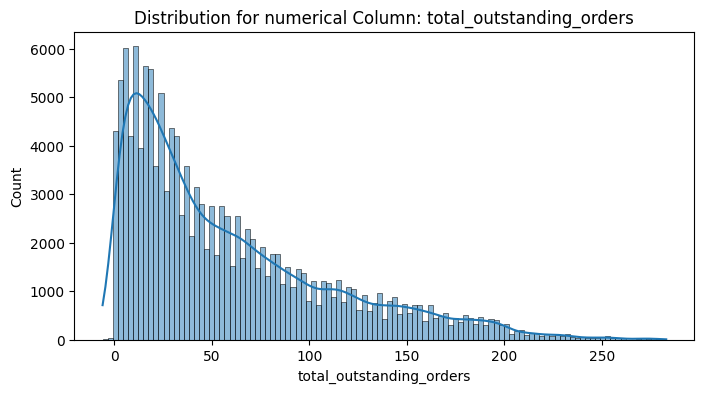

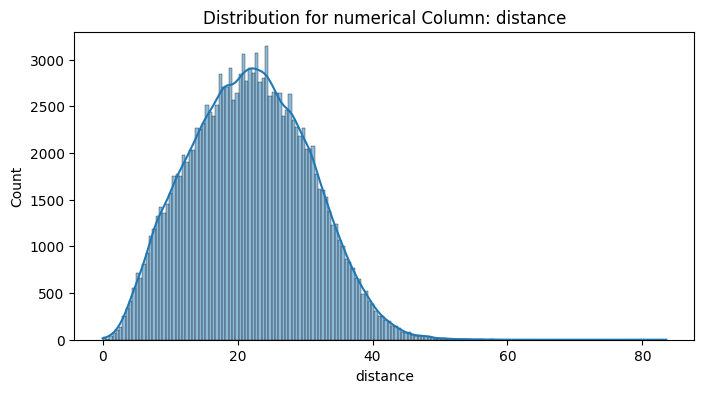

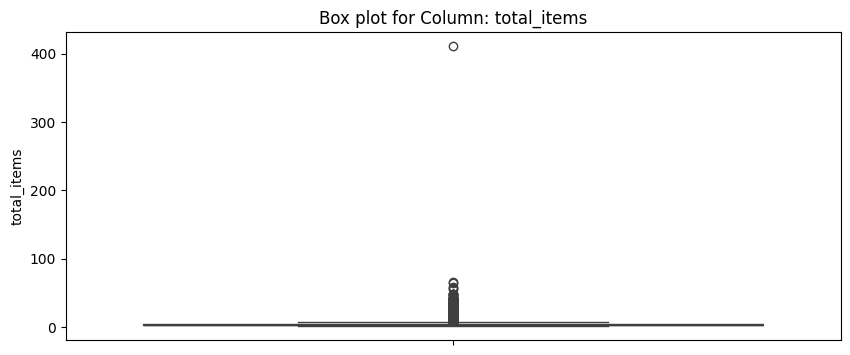

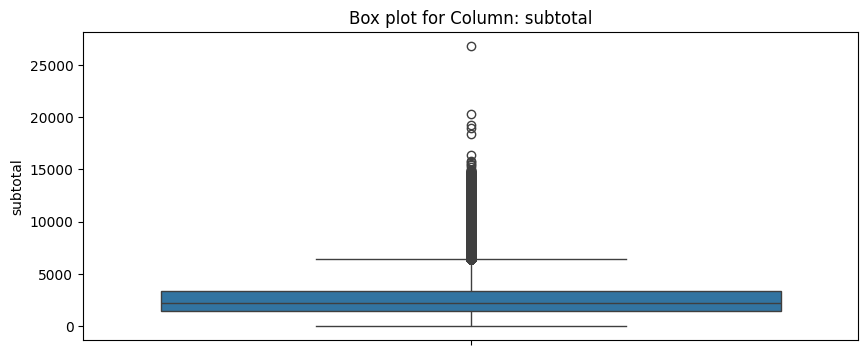

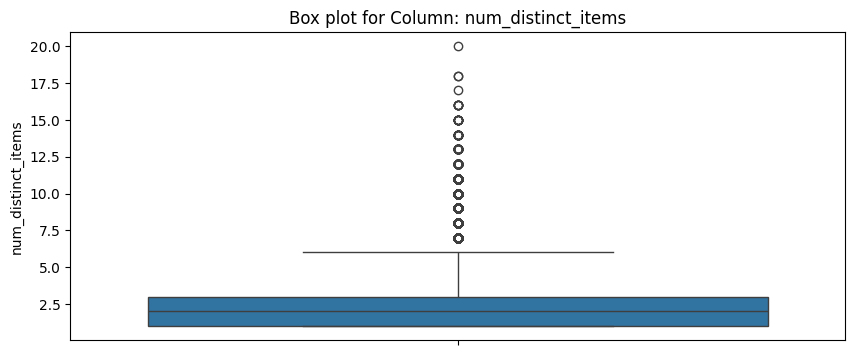

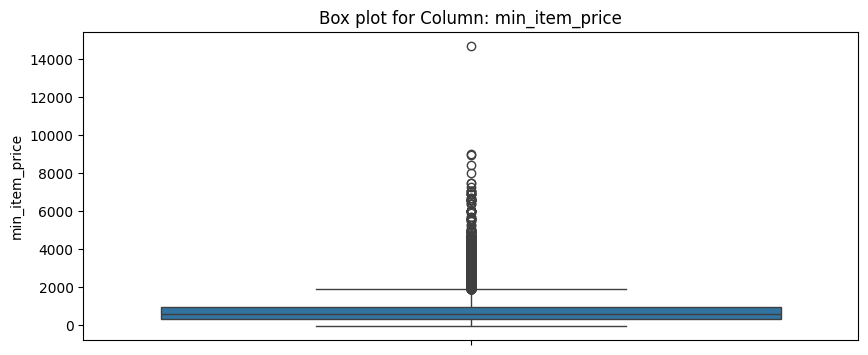

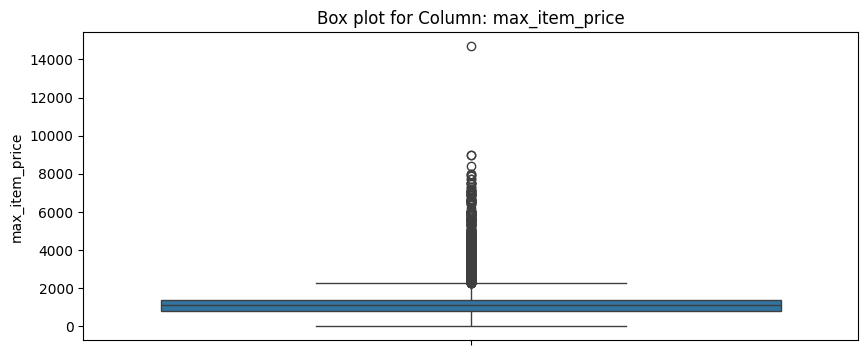

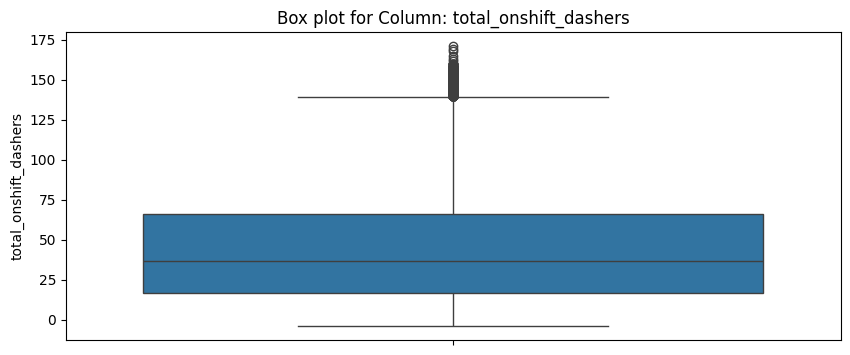

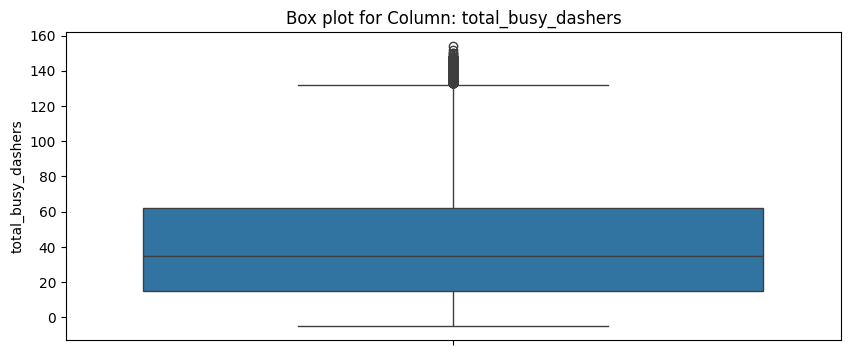

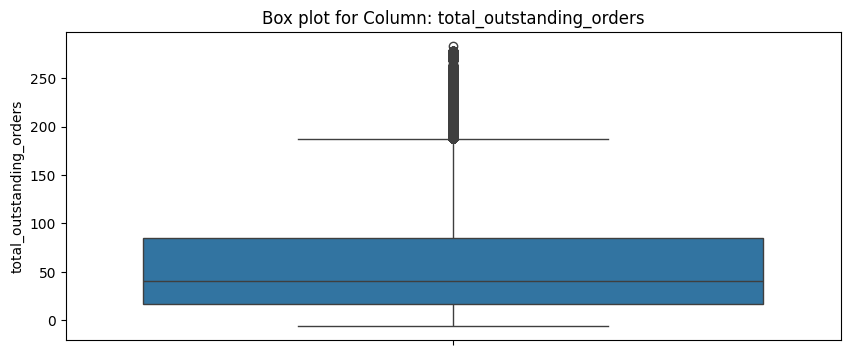

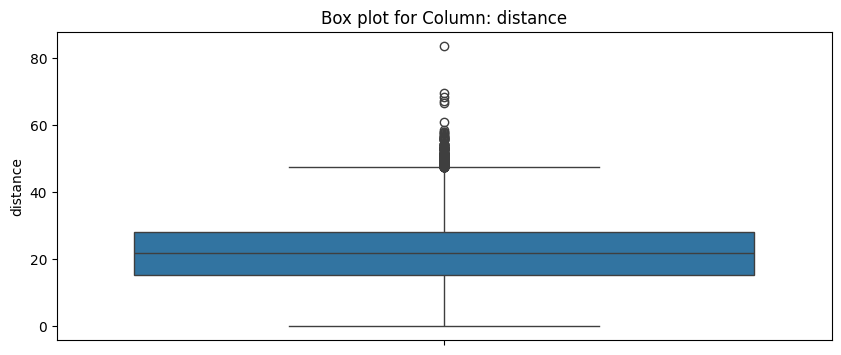

In [48]:
# Plot distributions for all numerical columns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

for column in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(X_train[column], kde=True)
    plt.title(f'Distribution for numerical Column: {column}')
    plt.show()

for column in num_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(X_train[column])
    plt.title(f'Box plot for Column: {column}')
    plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

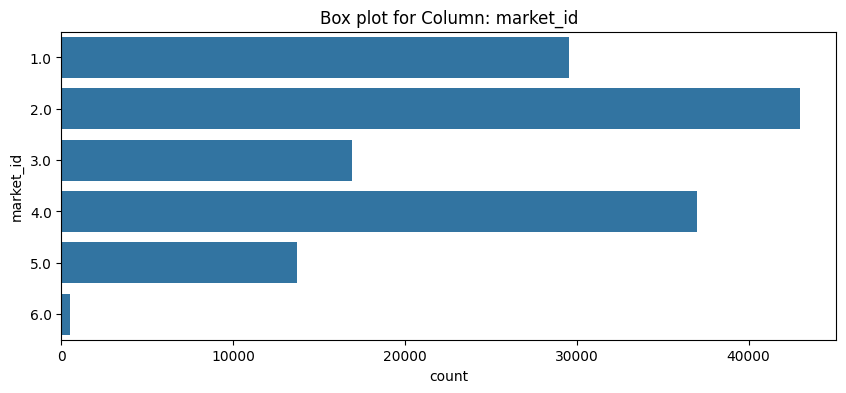

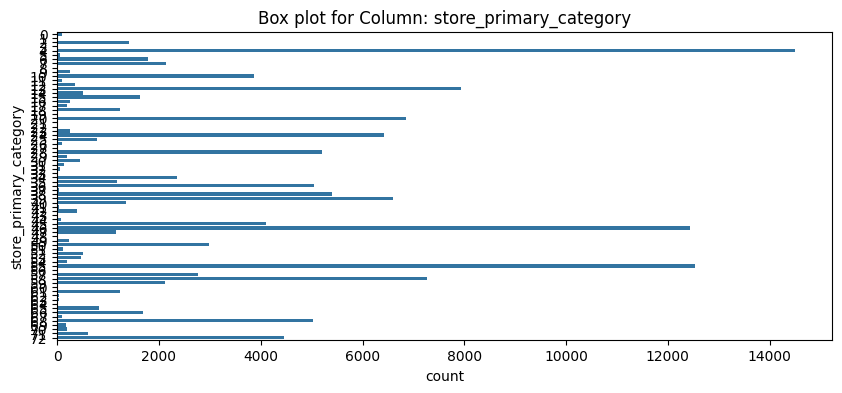

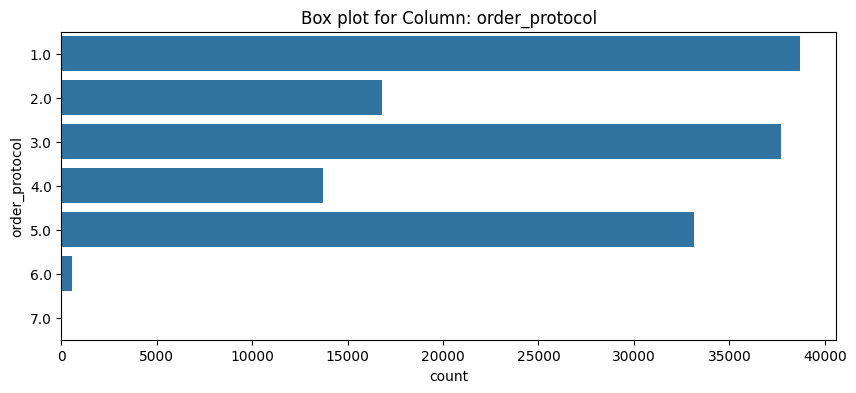

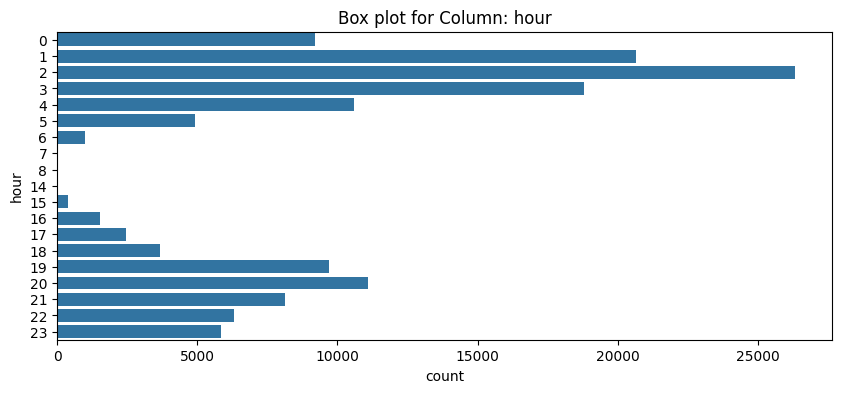

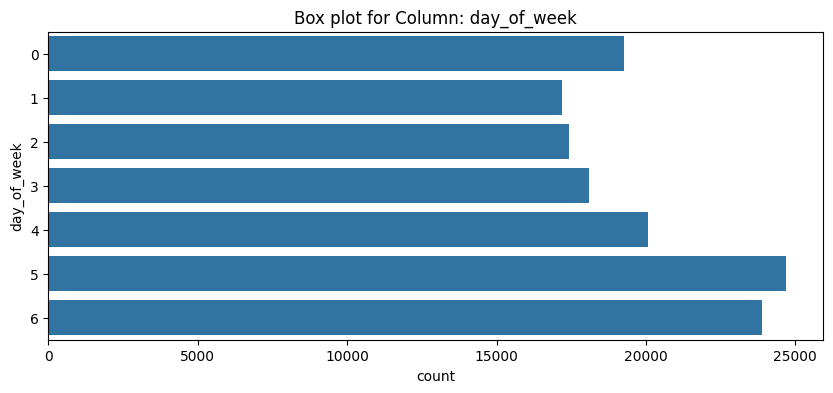

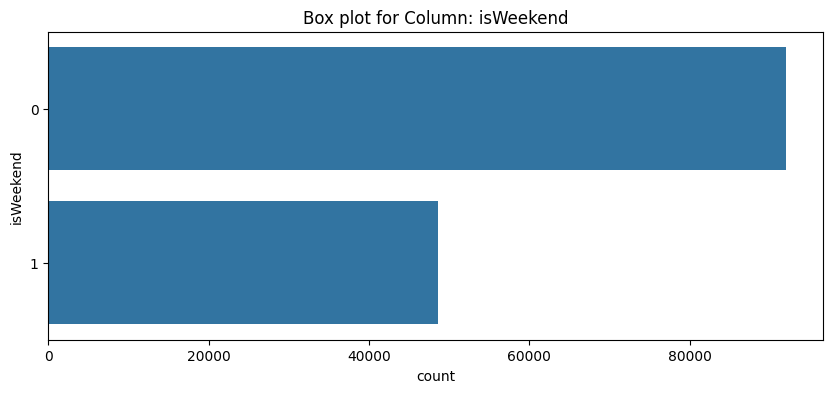

In [46]:
# Distribution of categorical columns

for column in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(X_train[column])
    plt.title(f'Box plot for Column: {column}')
    plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

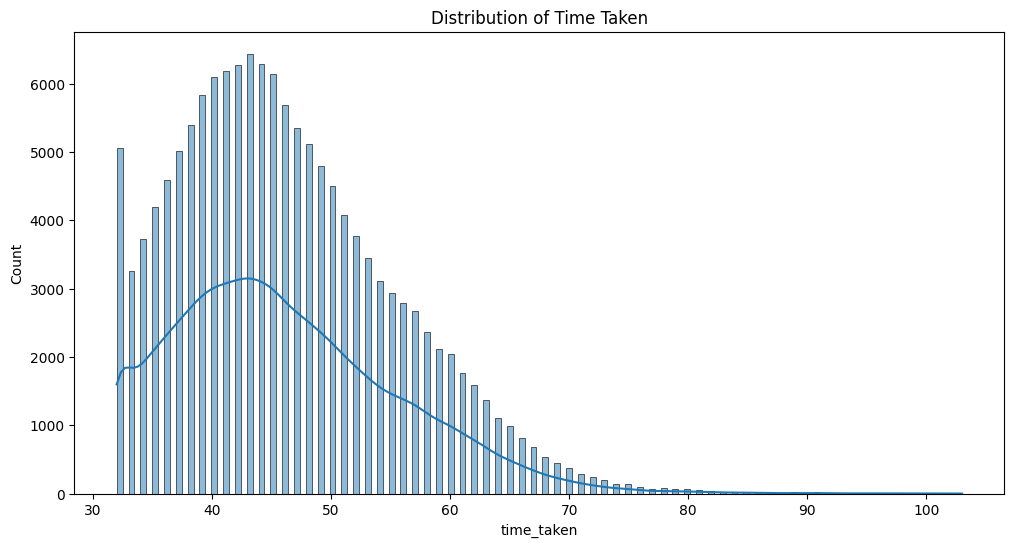

In [51]:
# Distribution of time_taken

plt.figure(figsize=(12, 6))
plt.title('Distribution of Time Taken')
sns.histplot(y_train, kde=True)
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

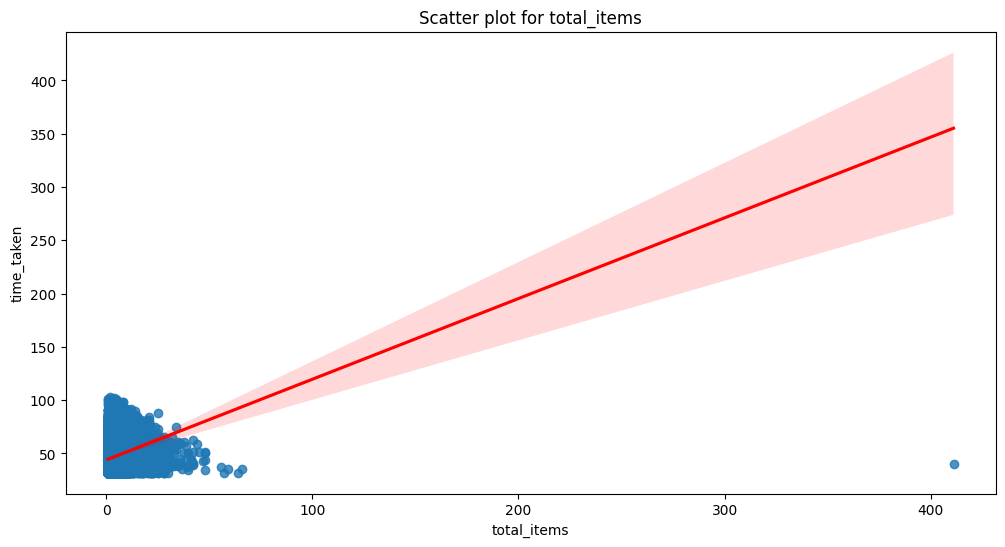

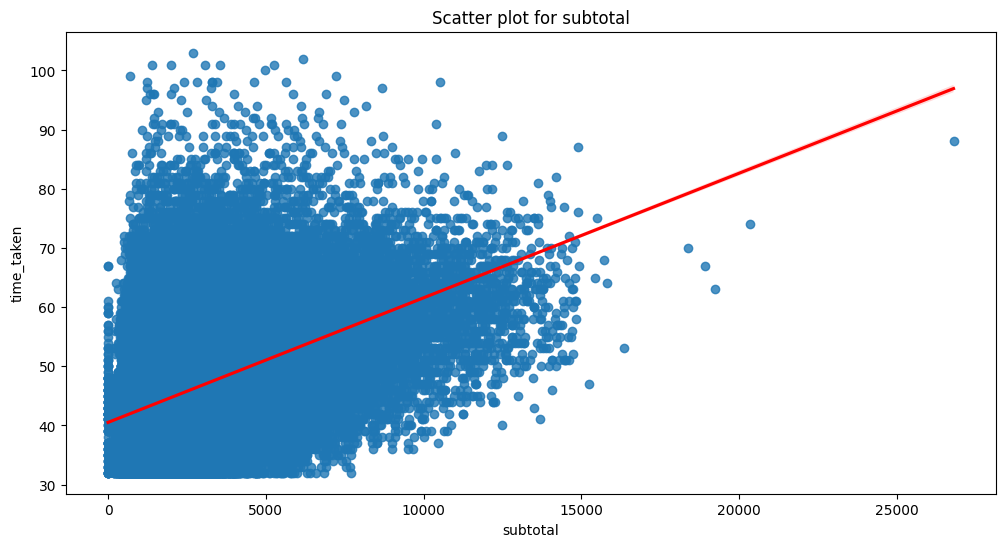

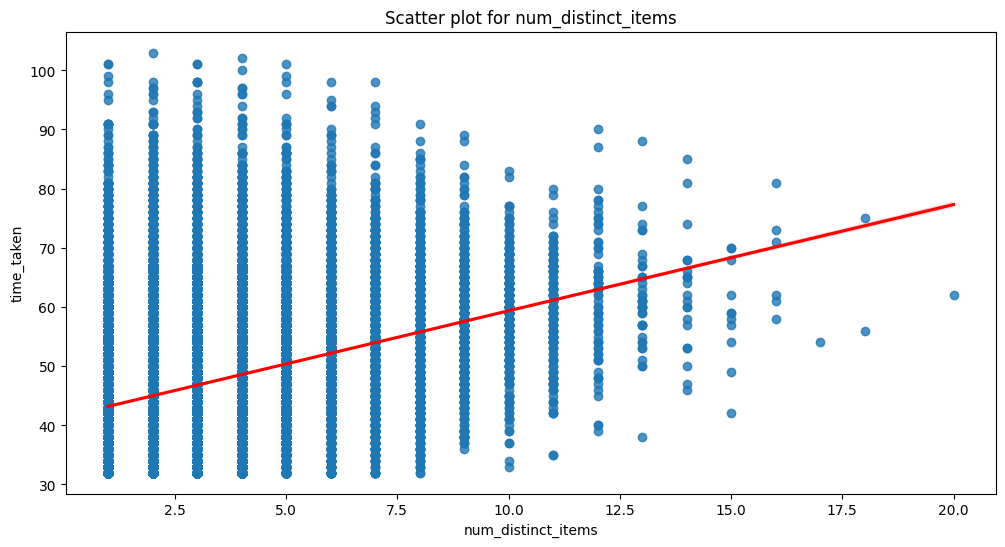

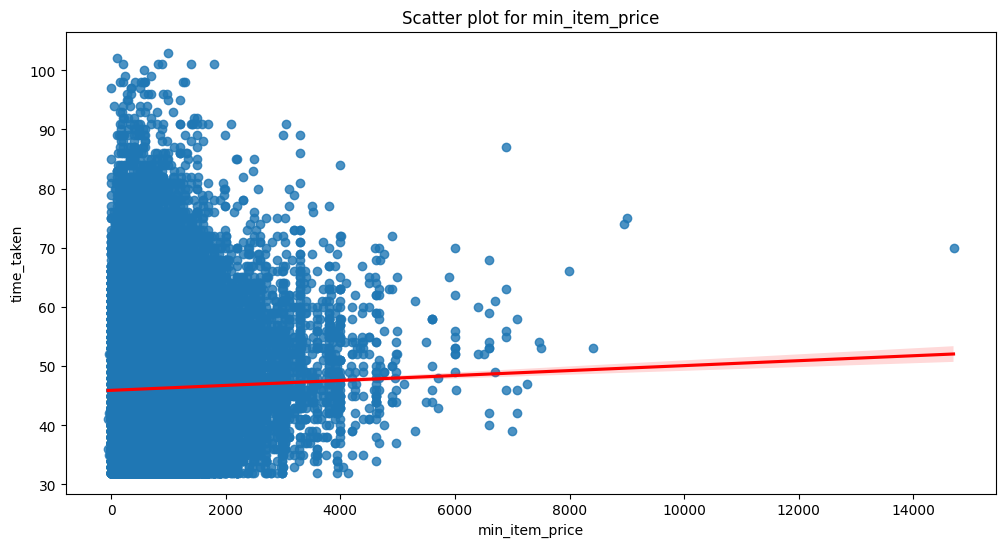

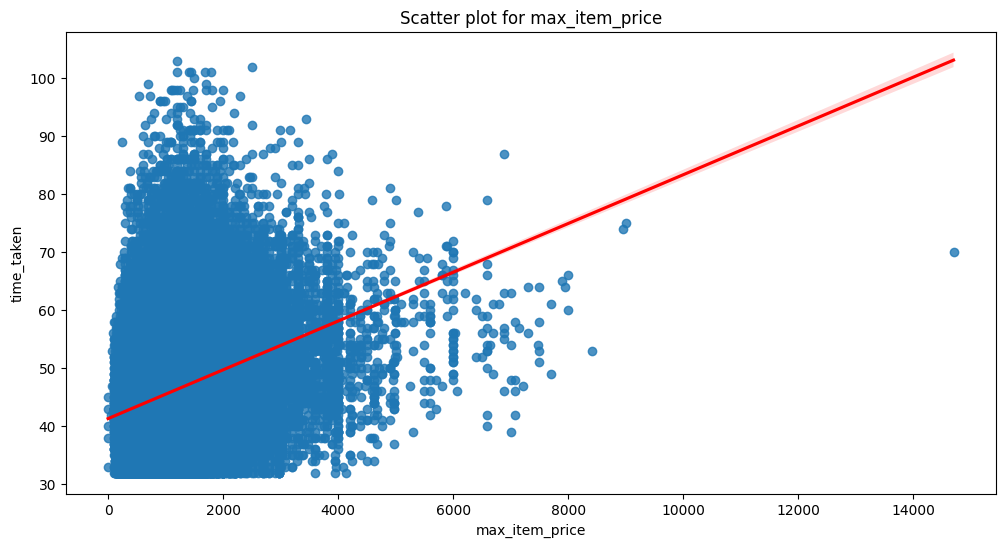

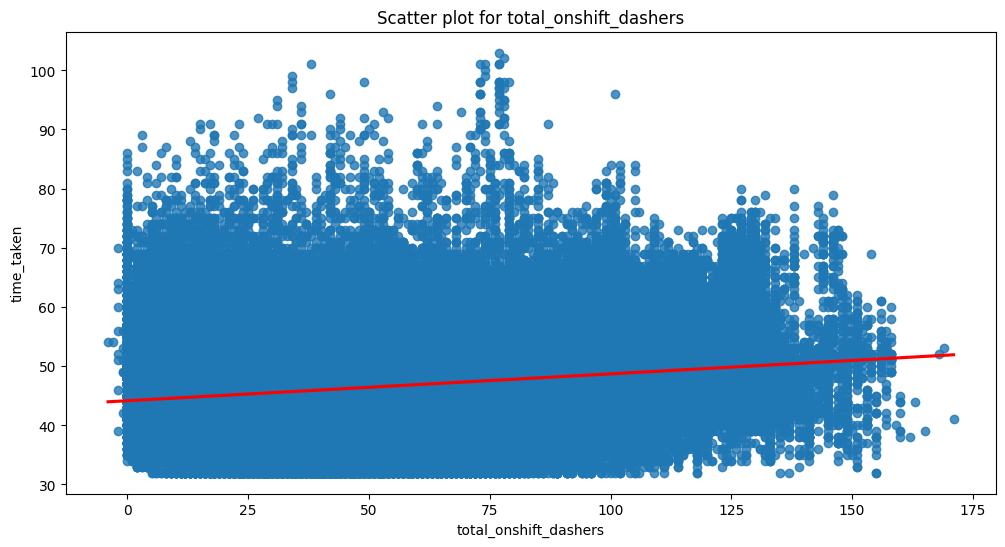

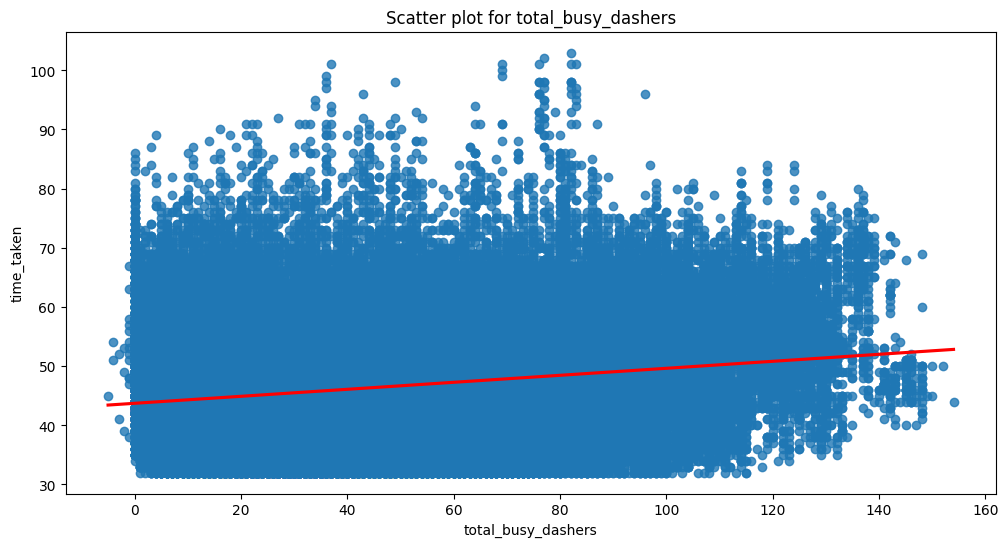

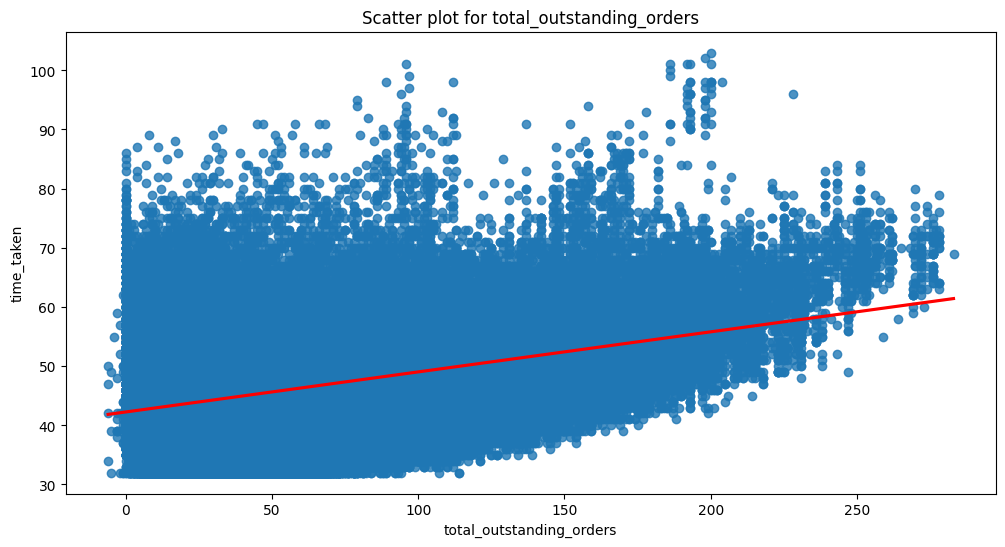

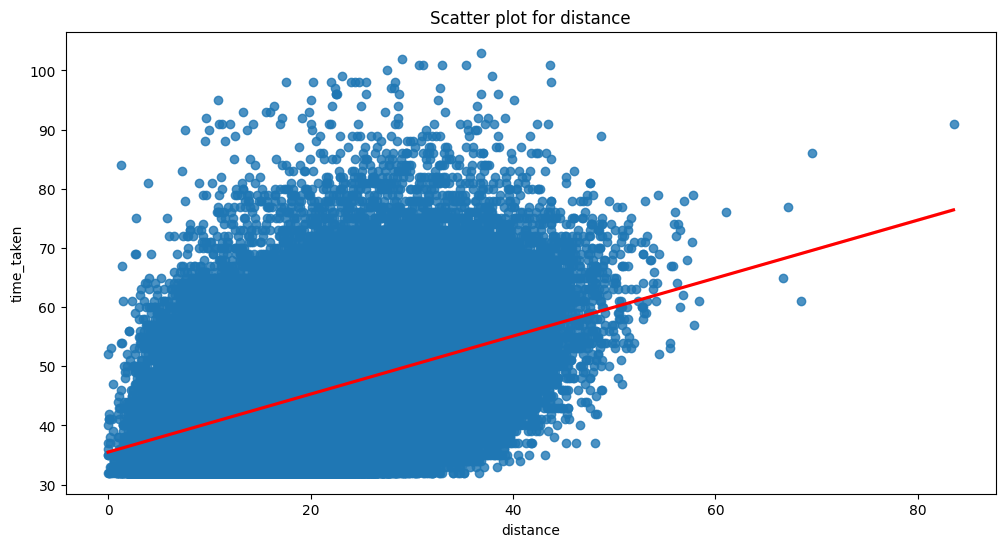

In [52]:
# Scatter plot to visualise the relationship between time_taken and other features

for column in num_cols:
    plt.figure(figsize=(12, 6))
    df_combined=pd.concat([X_train[column], y_train], axis=1)
    sns.regplot(x=df_combined[column], y=df_combined['time_taken'], line_kws={"color": "red"})
    plt.title(f'Scatter plot for {column}')
    plt.show()


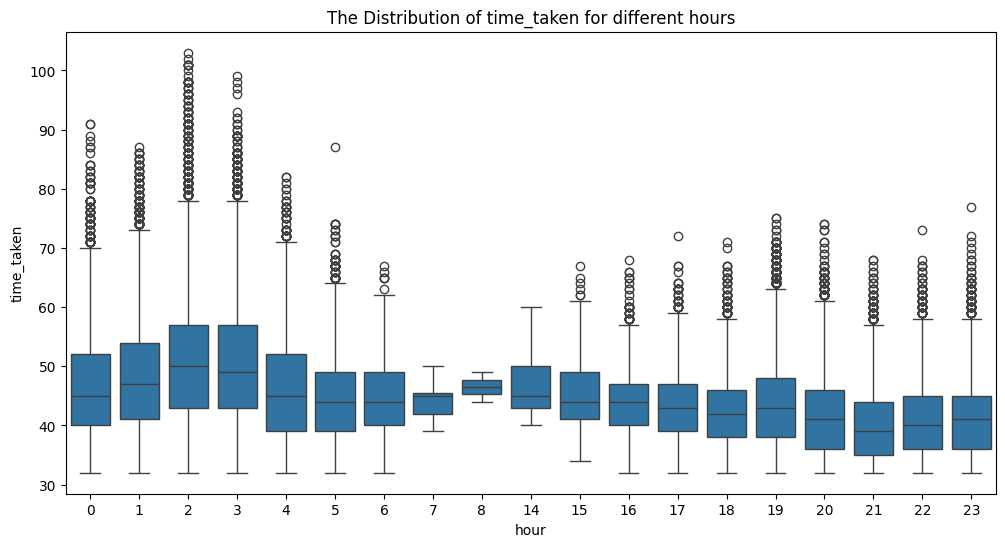

In [53]:
# Show the distribution of time_taken for different hours

df_combined=pd.concat([X_train['hour'], y_train], axis=1)

plt.figure(figsize=(12, 6))
plt.title('The Distribution of time_taken for different hours')
sns.boxplot(x='hour', y='time_taken', data=df_combined)
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

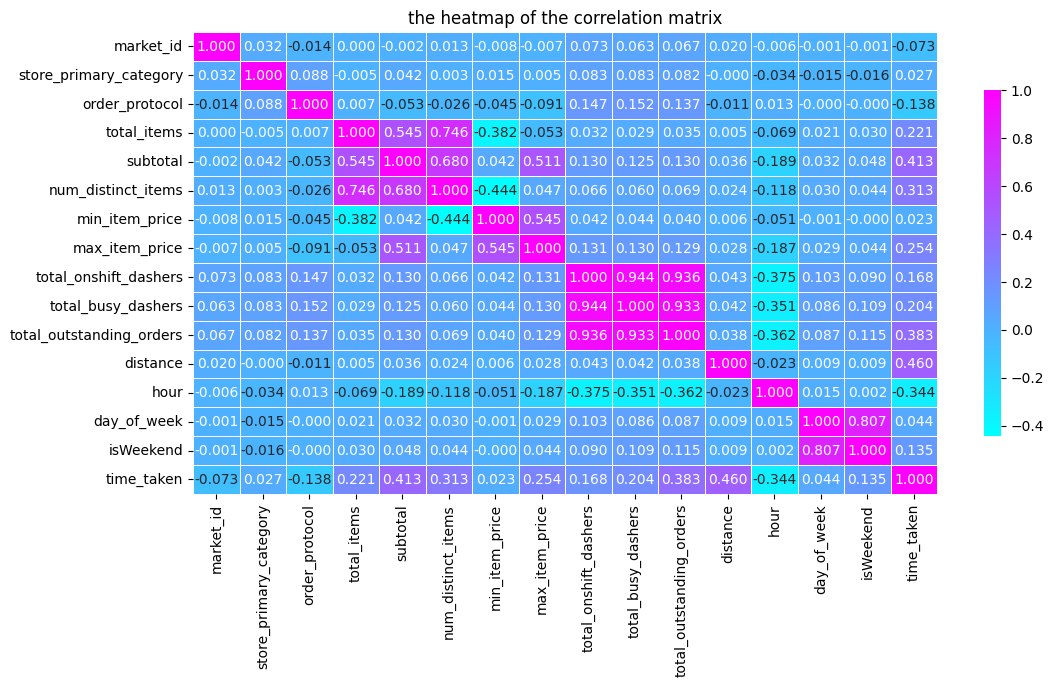

In [58]:
# Plot the heatmap of the correlation matrix

df_combined=pd.concat([X_train, y_train], axis=1)

plt.figure(figsize=(12,6))
plt.title('the heatmap of the correlation matrix')
sns.heatmap(df_combined.corr(), annot=True, cmap='cool', fmt='.3f', linewidths=0.7, cbar_kws={"shrink": 0.75})
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [59]:
# Drop 3-5 weakly correlated columns from training dataset

X_train = X_train.drop(['market_id', 'store_primary_category', 'order_protocol', 'min_item_price', 'day_of_week'], axis=1)
X_test = X_test.drop(['market_id', 'store_primary_category', 'order_protocol', 'min_item_price', 'day_of_week'], axis=1)

In [60]:
print(len(X_train))
print(len(y_train))

140621
140621


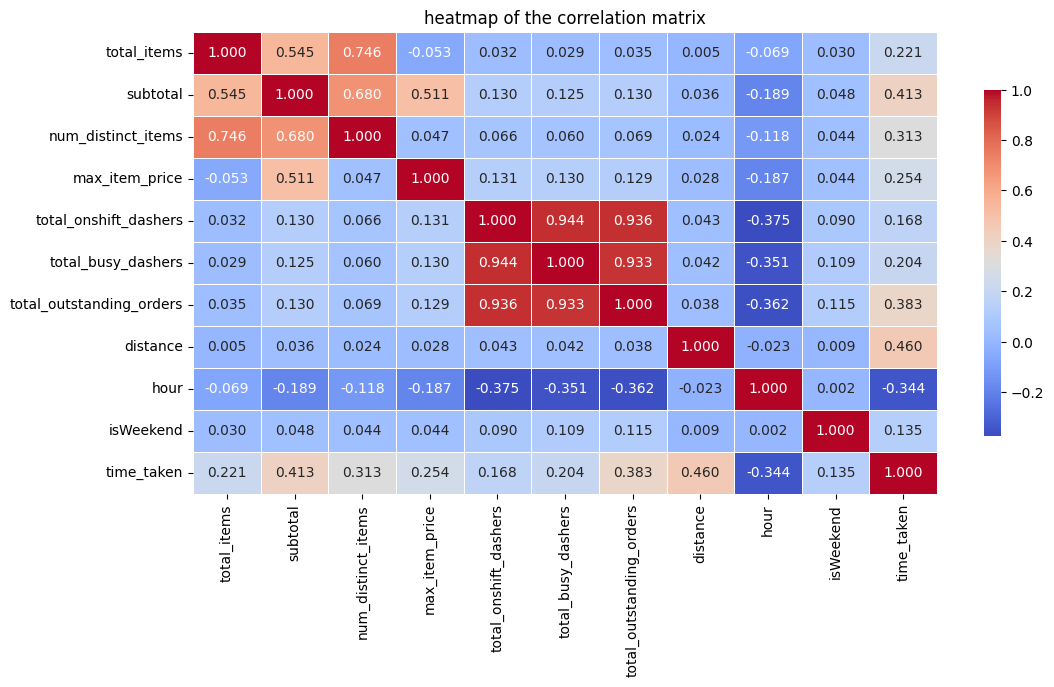

In [62]:
df_combined=pd.concat([X_train, y_train], axis=1)

plt.figure(figsize=(12,6))
plt.title('heatmap of the correlation matrix')
sns.heatmap(df_combined.corr(), annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5, cbar_kws={"shrink": 0.75})
plt.show()

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

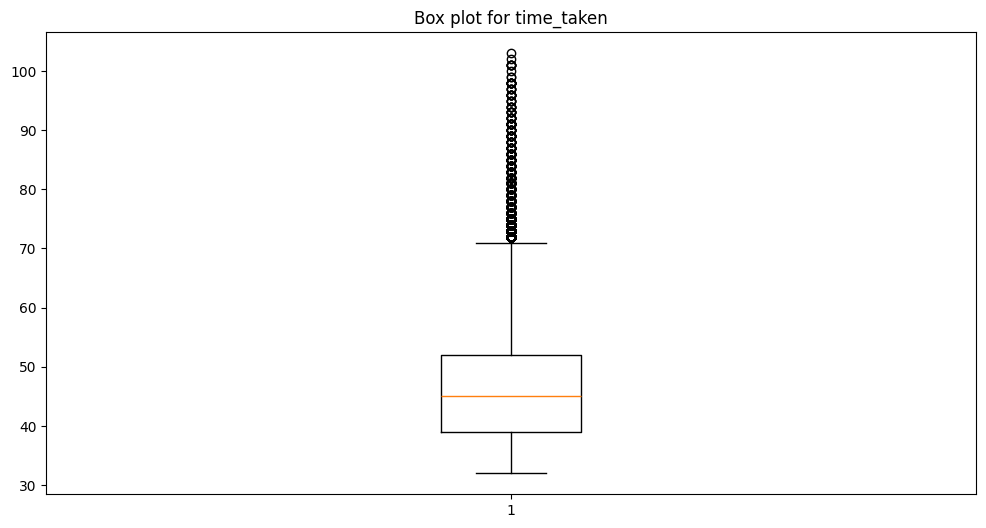

In [63]:
# Boxplot for time_taken

plt.figure(figsize=(12,6))
plt.title('Box plot for time_taken')
plt.boxplot(y_train)
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

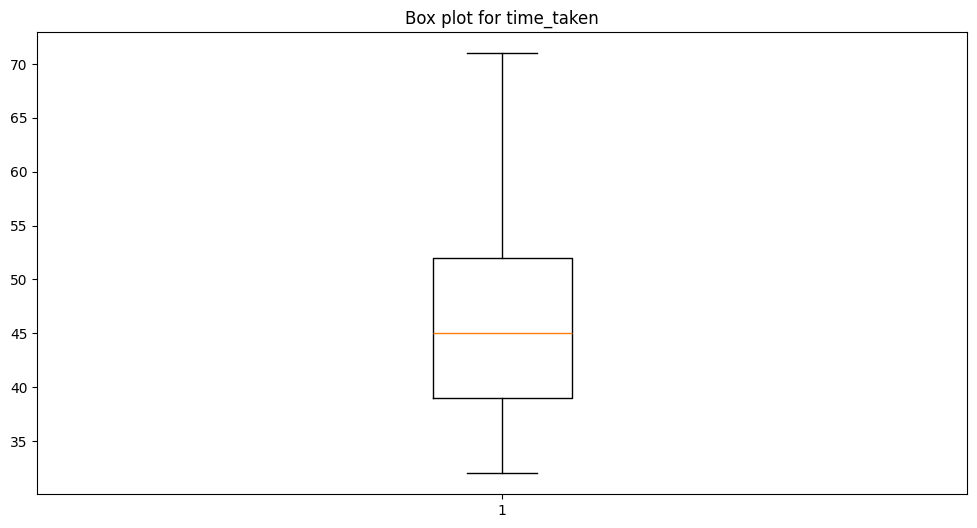

count    139204.000000
mean         45.869530
std           8.797251
min          32.000000
25%          39.000000
50%          45.000000
75%          52.000000
max          71.000000
Name: time_taken, dtype: float64

In [64]:
# Handle outliers

Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)

IQR = Q3 - Q1

# Filter out the outliers in y_train
y_train = y_train[(y_train >= Q1 - 1.5 * IQR) & (y_train <= Q3 + 1.5 * IQR)]

# Get the indices of the valid (non-outlier) values
valid_indices = y_train.index

# Filter X_train using those valid indices
X_train = X_train.loc[valid_indices]

plt.figure(figsize=(12,6))
plt.title('Box plot for time_taken')
plt.boxplot(y_train)
plt.show()

y_train.describe()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [65]:
# Define numerical and categorical columns for easy EDA and data manipulation

num_cols = X_test.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_test.select_dtypes('category').columns.tolist()

print(num_cols)
print(cat_cols)

['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
['hour', 'isWeekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

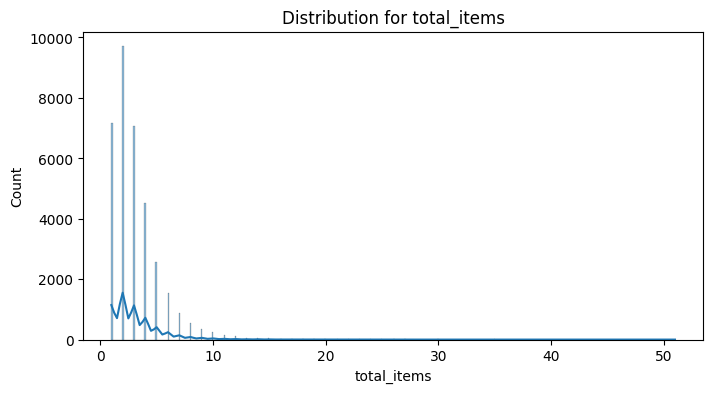

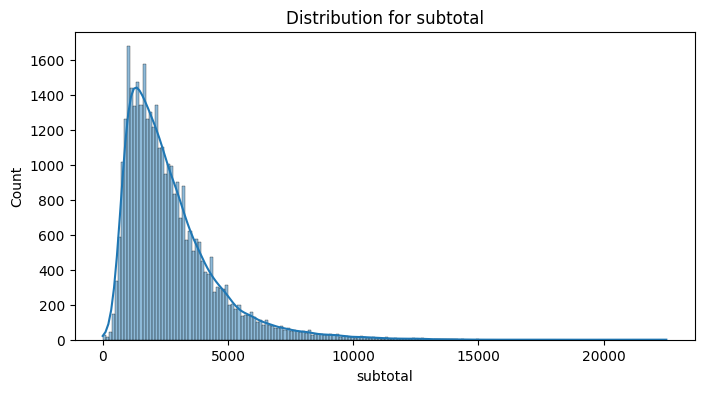

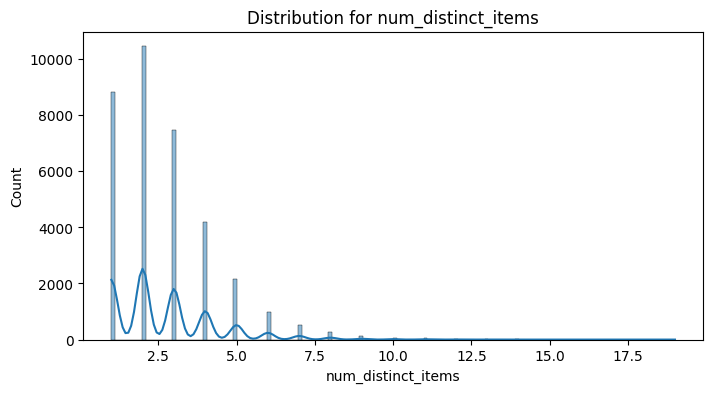

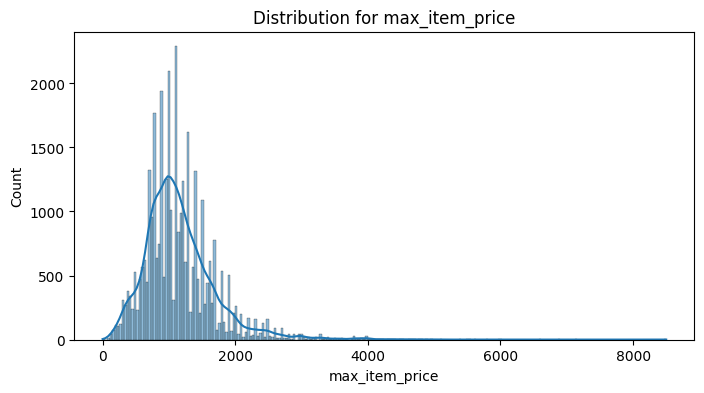

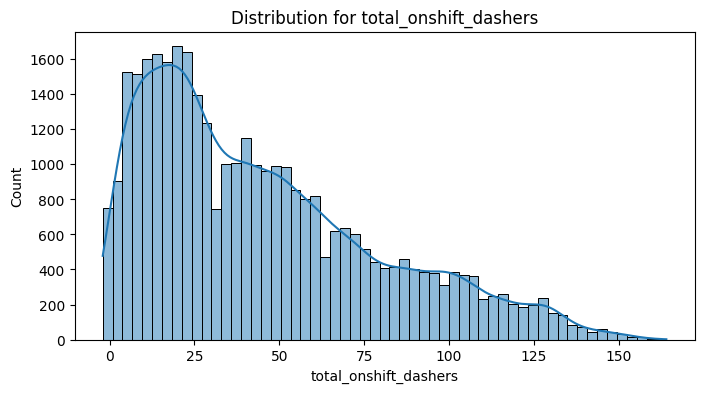

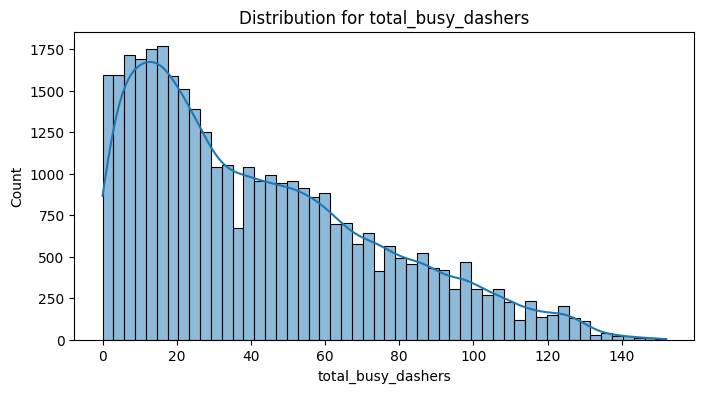

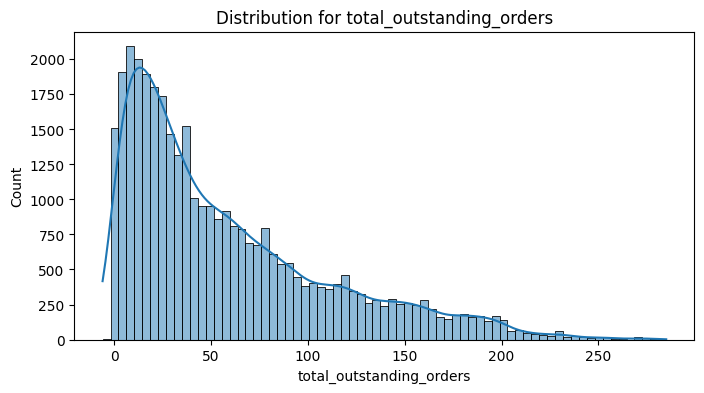

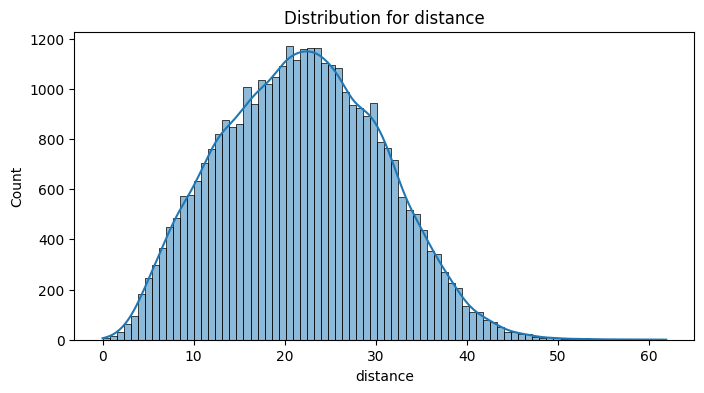

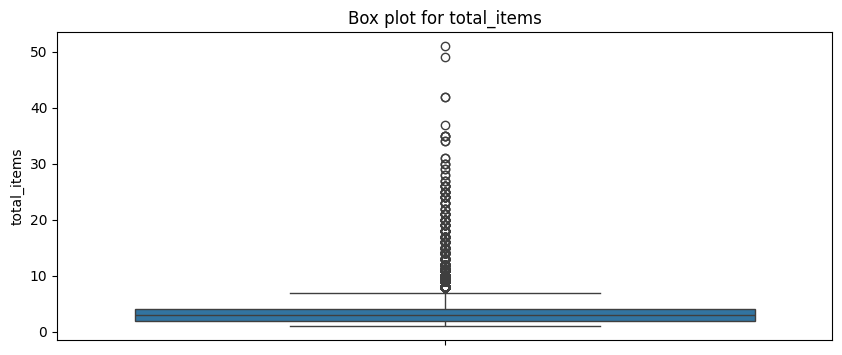

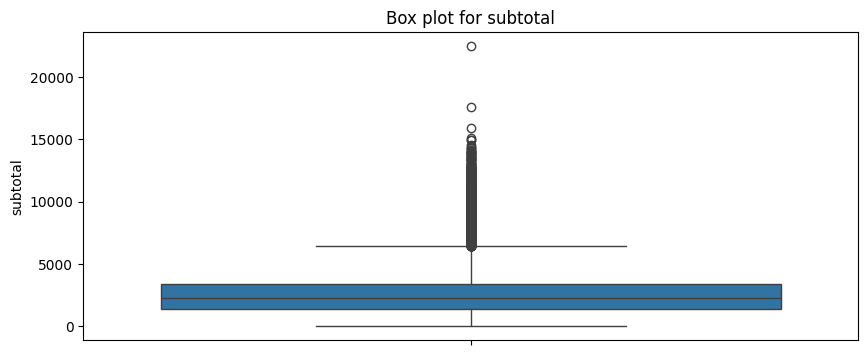

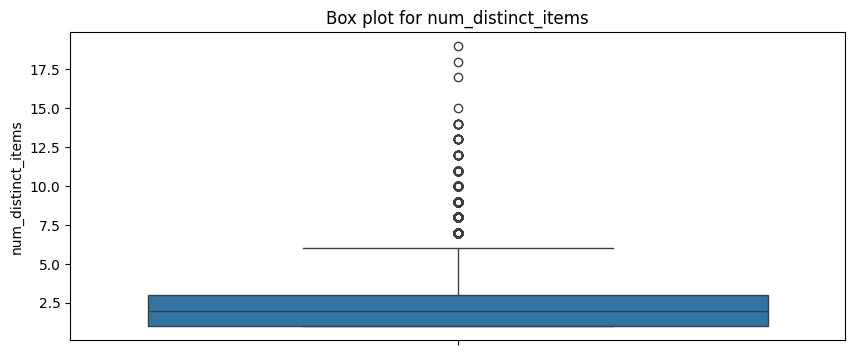

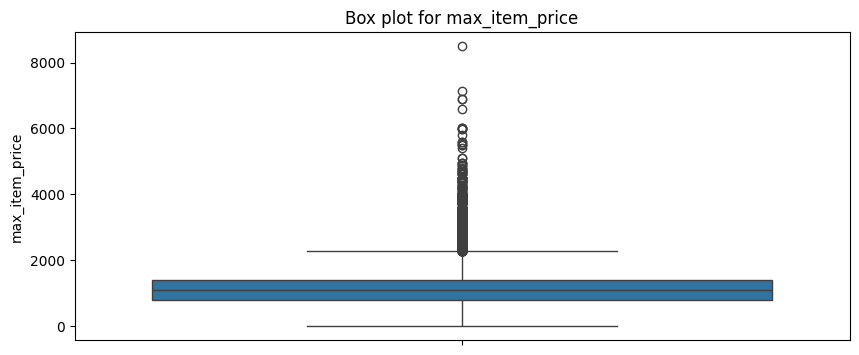

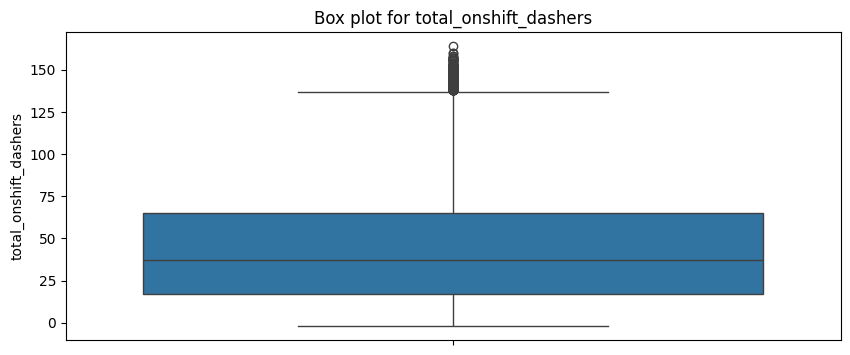

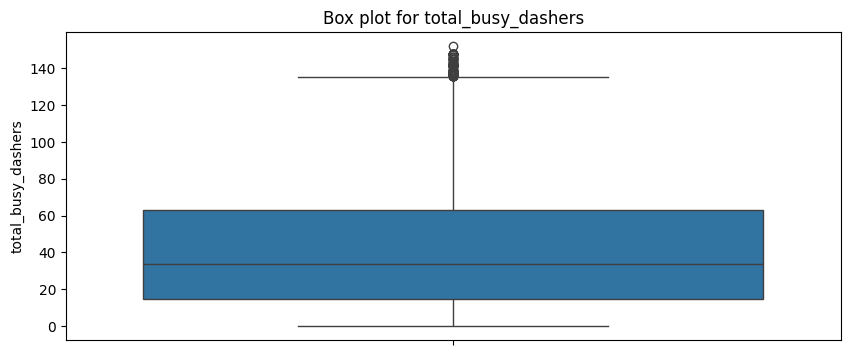

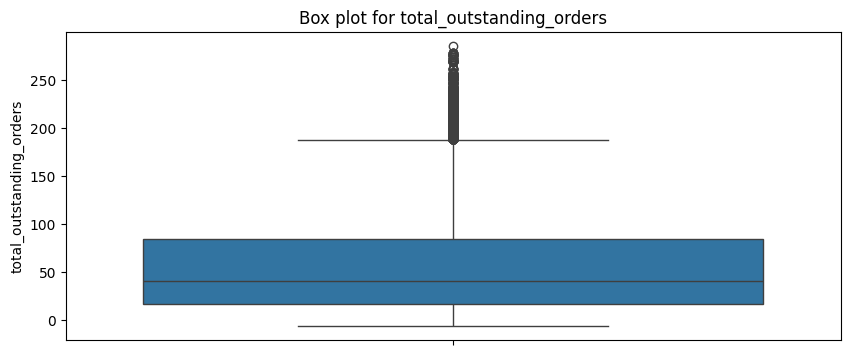

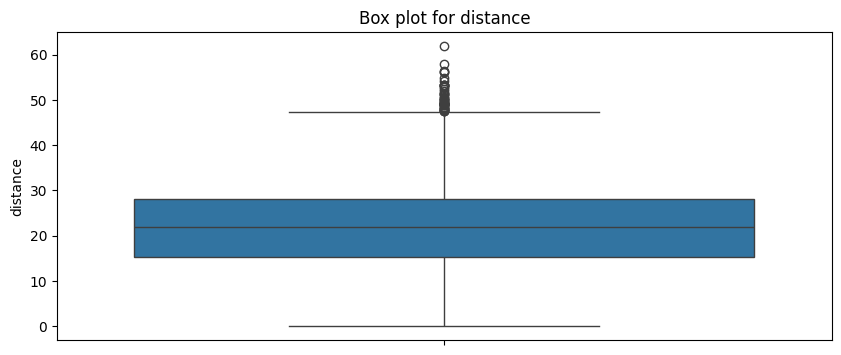

In [66]:
# Plot distributions for all numerical columns

for column in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(X_test[column], kde=True)
    plt.title(f'Distribution for {column}')
    plt.show()

for column in num_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(X_test[column])
    plt.title(f'Box plot for {column}')
    plt.show()

##### **4.1.2**
Check the distribution of categorical features

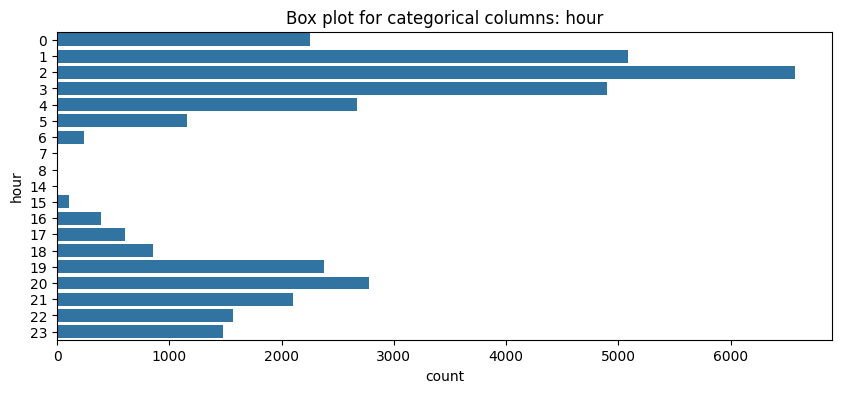

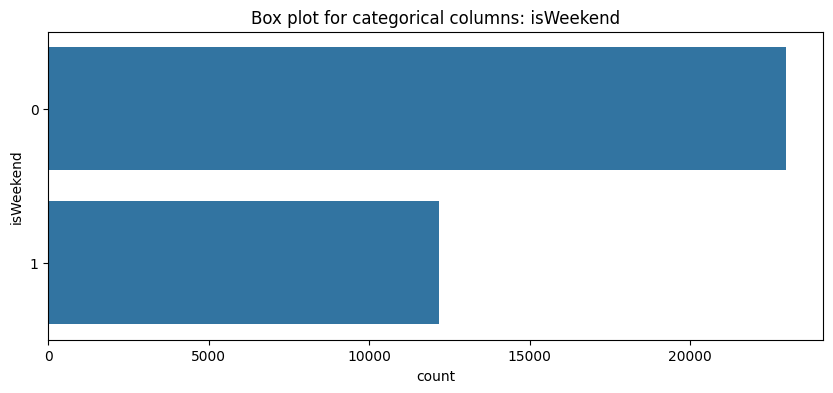

In [73]:
# Distribution of categorical columns

for column in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(X_test[column])
    plt.title(f'Box plot for categorical columns: {column}')
    plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

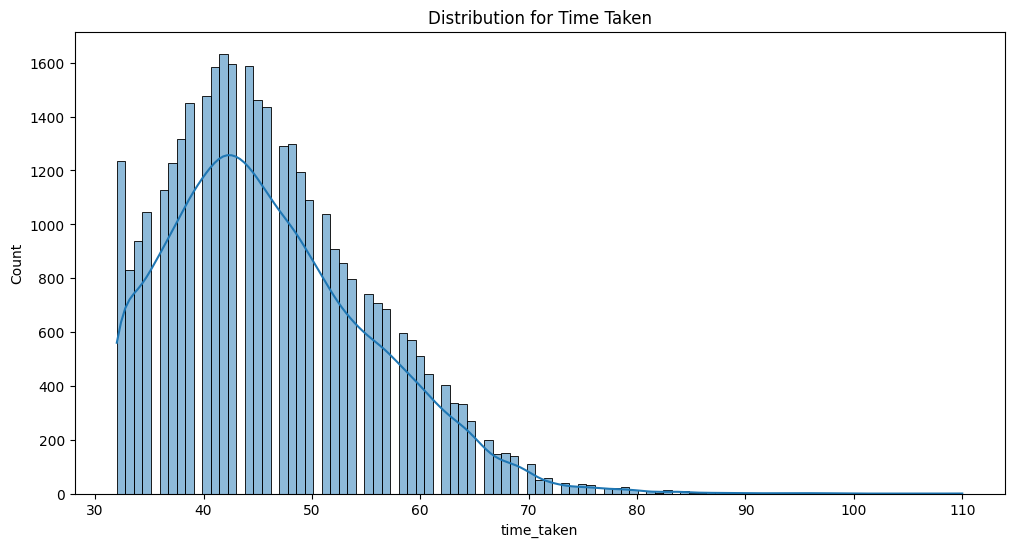

In [75]:
# Distribution of time_taken

plt.figure(figsize=(12, 6))
plt.title('Distribution for Time Taken')
sns.histplot(y_test, kde=True)
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

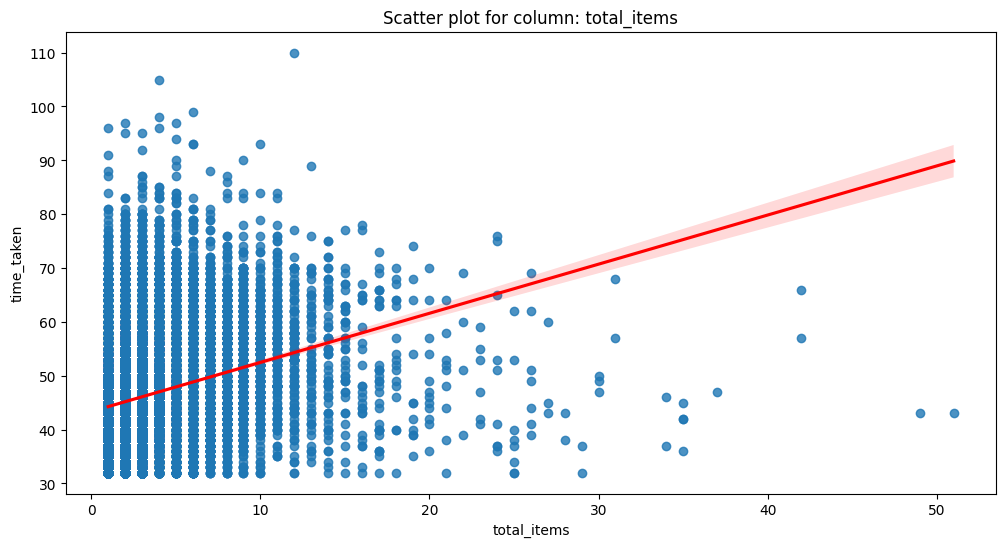

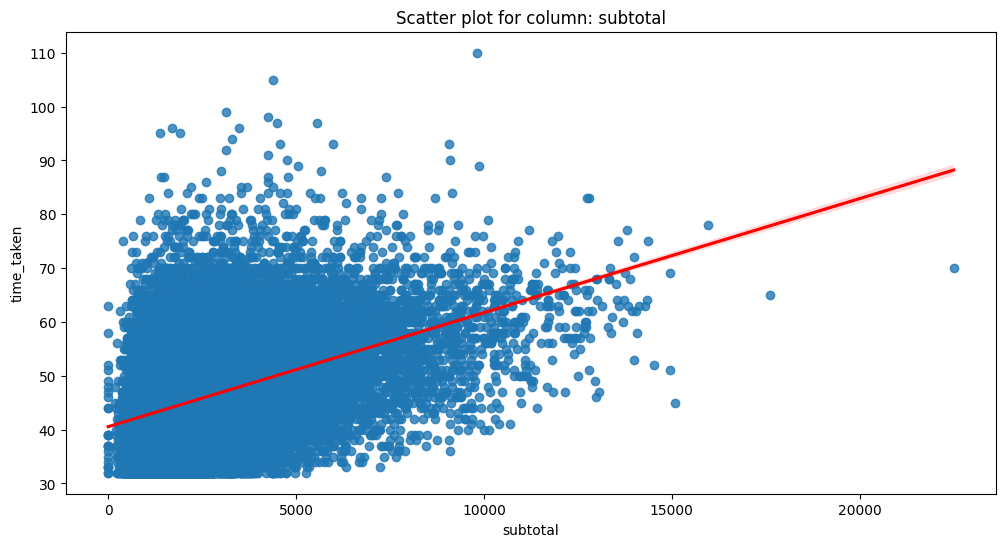

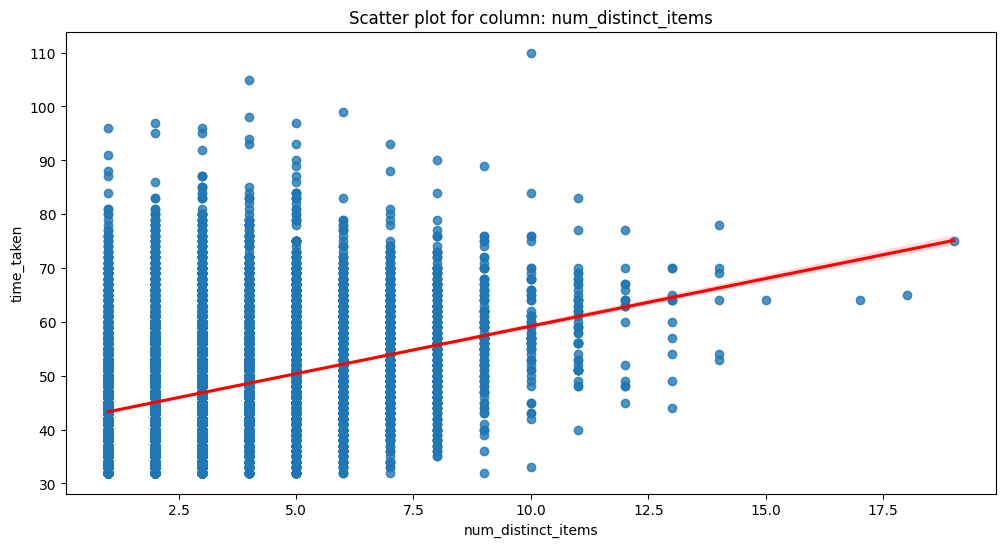

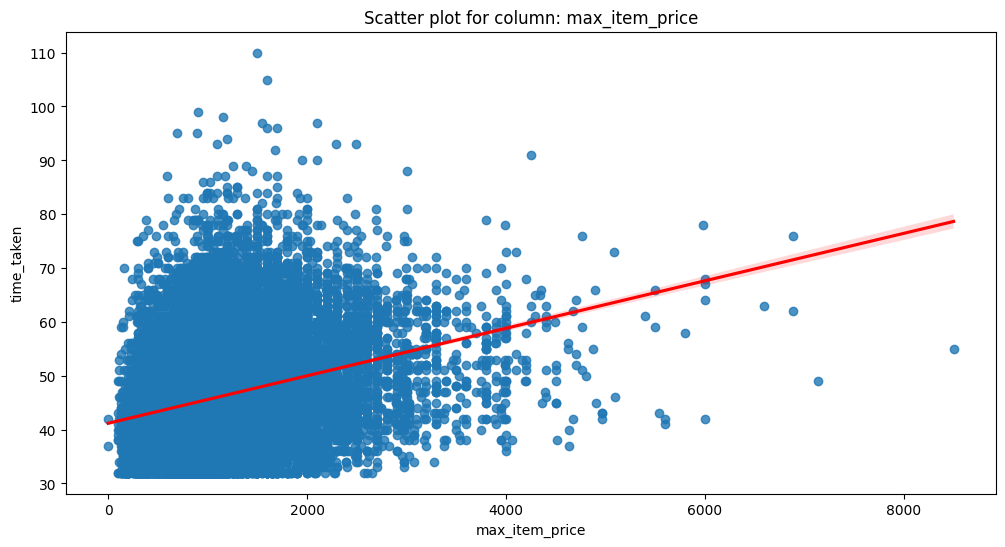

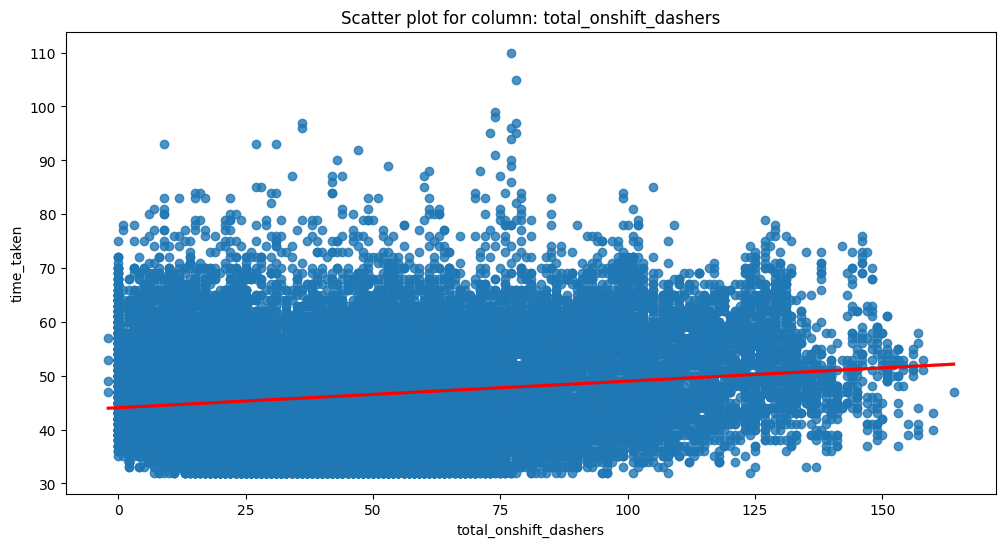

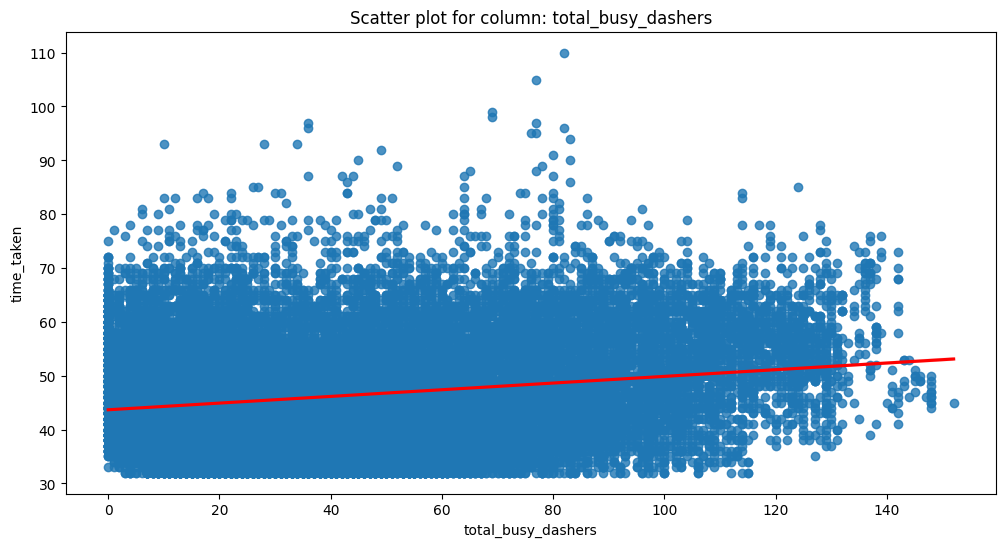

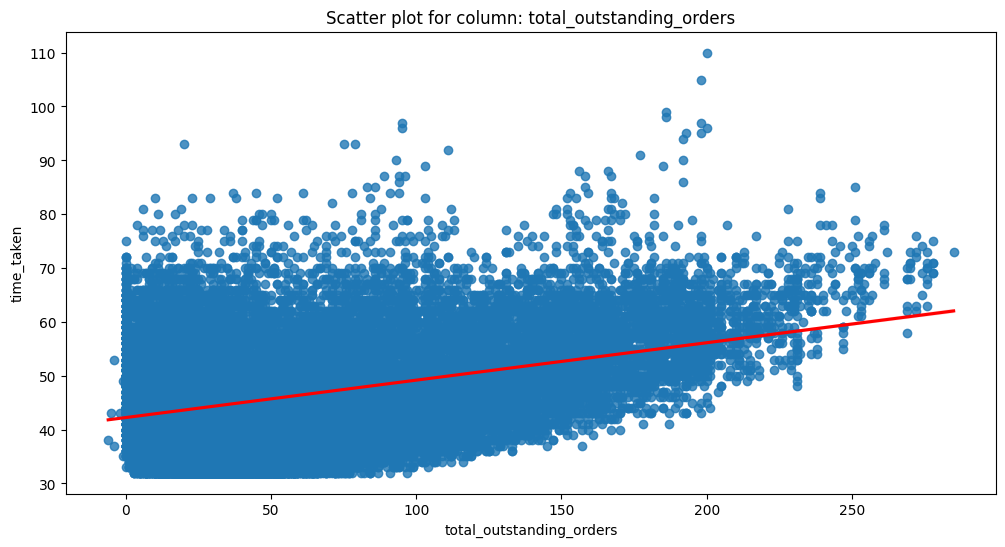

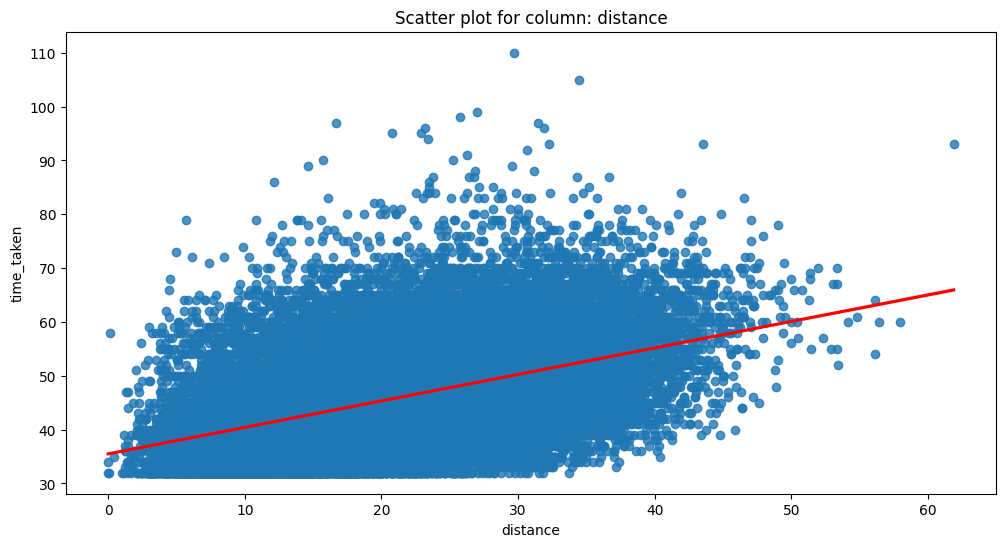

In [81]:
# Scatter plot to visualise the relationship between time_taken and other features

for column in num_cols:
    plt.figure(figsize=(12, 6))
    df_combined=pd.concat([X_test[column], y_test], axis=1)
    sns.regplot(x=df_combined[column], y=df_combined['time_taken'], line_kws={"color": "red"})
    plt.title(f'Scatter plot for column: {column}')
    plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [84]:
# Import libraries
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [86]:
# Apply scaling to the numerical columns

num_cols = X_train.select_dtypes(include=np.number).columns.tolist()

print(num_cols)

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']


total_items  subtotal  num_distinct_items  max_item_price  \
42111     -0.809165 -0.735240           -1.032415        0.344568   
58452      0.670144  0.891640            1.455608       -0.458711   
20644      1.039971  2.884361            0.211596        0.523075   
79735     -0.069511  0.545201            0.211596        0.523075   
167933     0.670144  3.269602            1.455608        2.620526   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
42111               -0.632685           -0.676953                 -0.742299   
58452                1.946139            1.817179                  2.868467   
20644                1.018921            1.162469                  1.101497   
79735                2.380772            2.004239                  2.215456   
167933              -0.024198            0.071287                  0.064362   

        distance hour isWeekend  
42111  -1.395501   20         0  
58452   1.469799    2         1  
20644   1.511126    3         0  
79735   0.459597    2         1  
167933 -0.463360    2         0

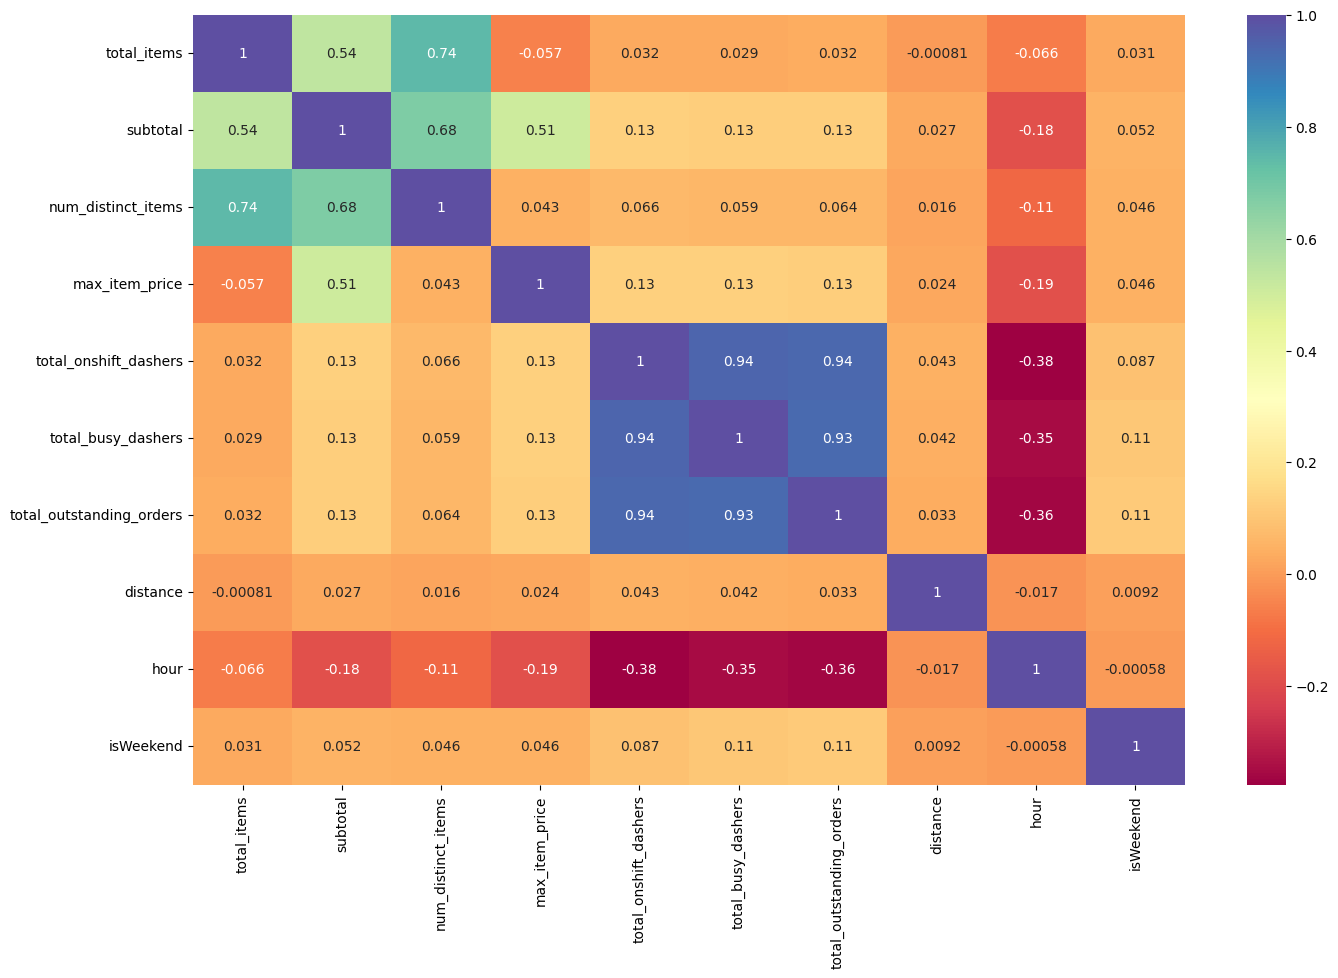

In [89]:
plt.figure(figsize=(16, 10))
sns.heatmap(X_train.corr(), annot=True, cmap='Spectral')
plt.show()

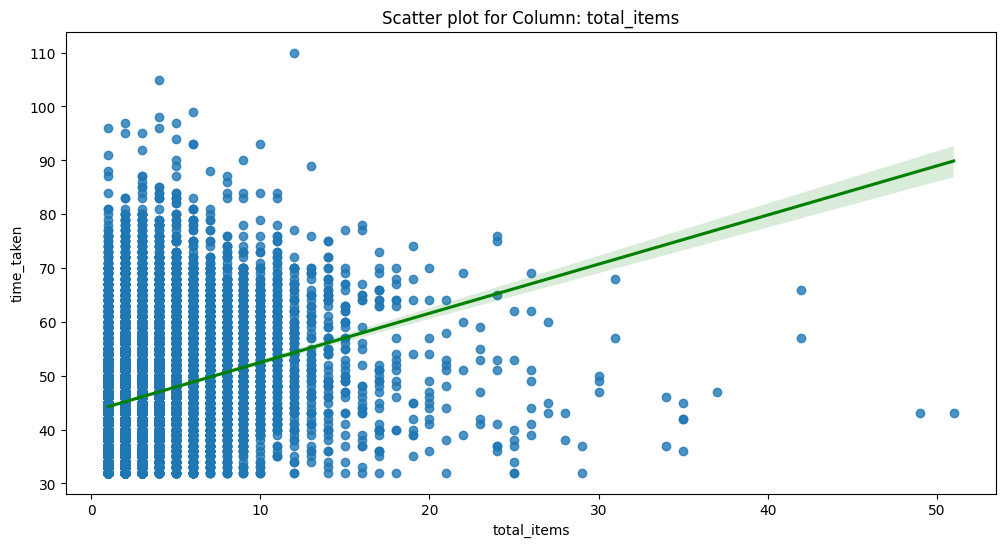

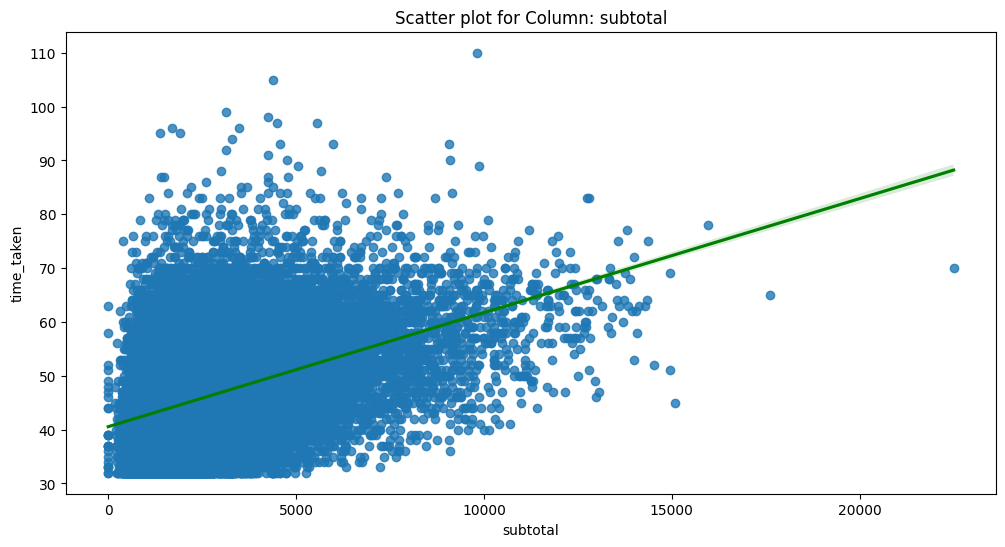

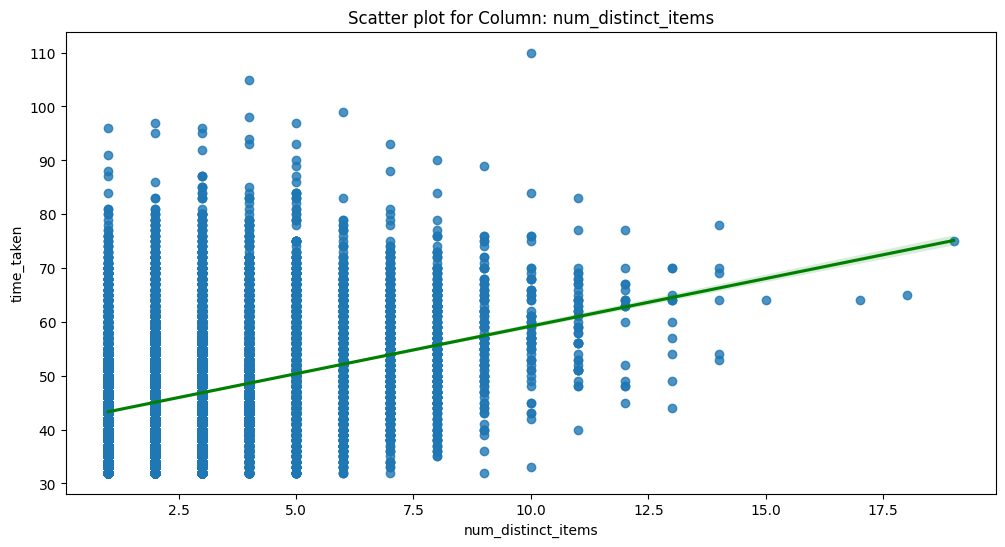

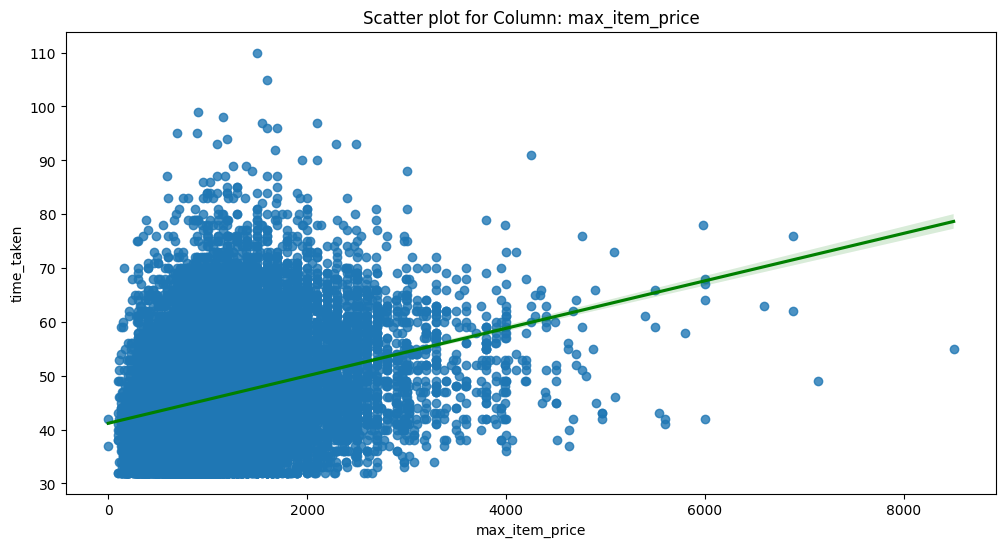

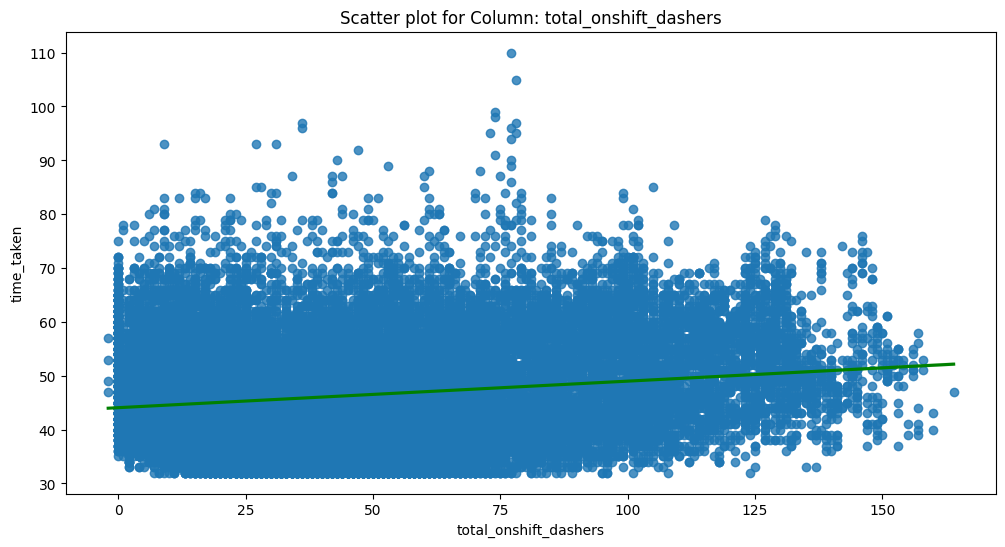

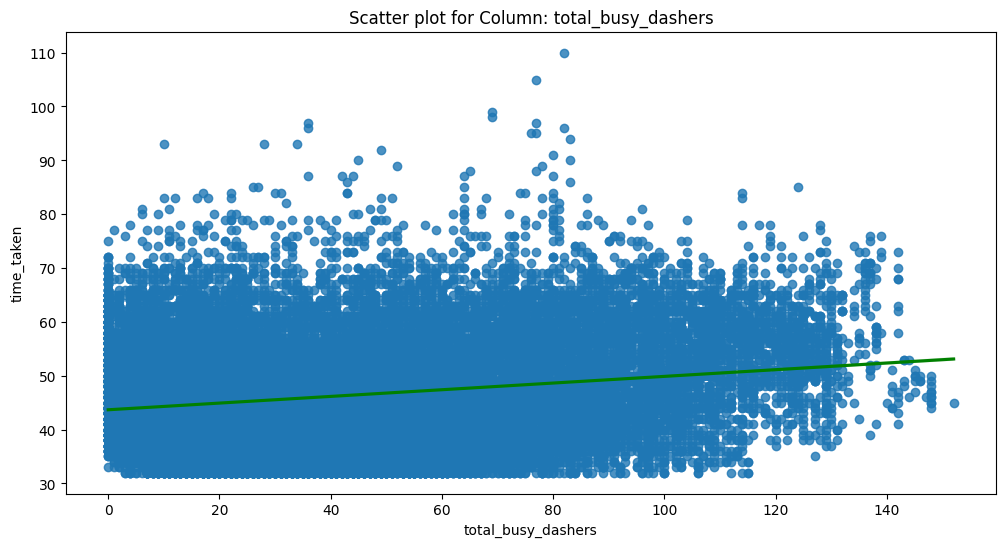

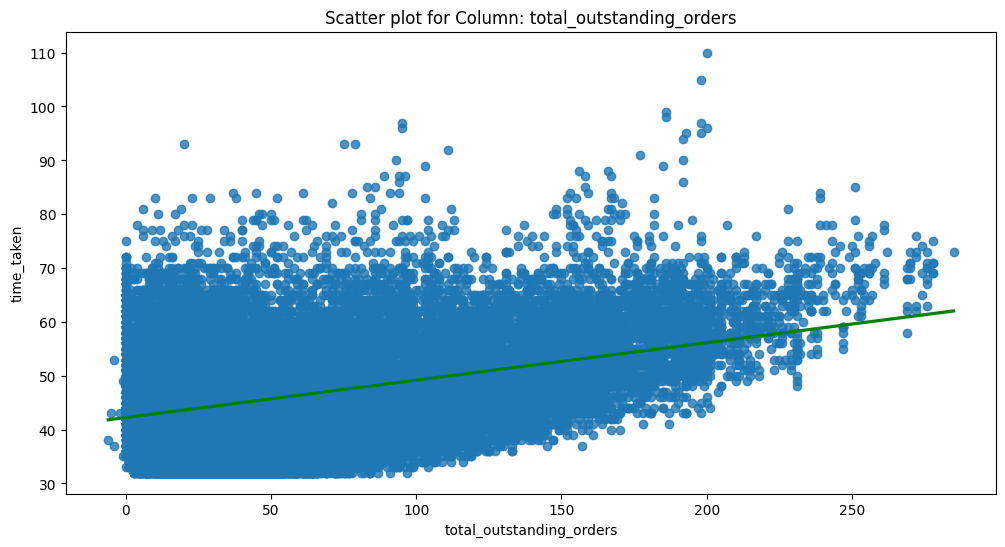

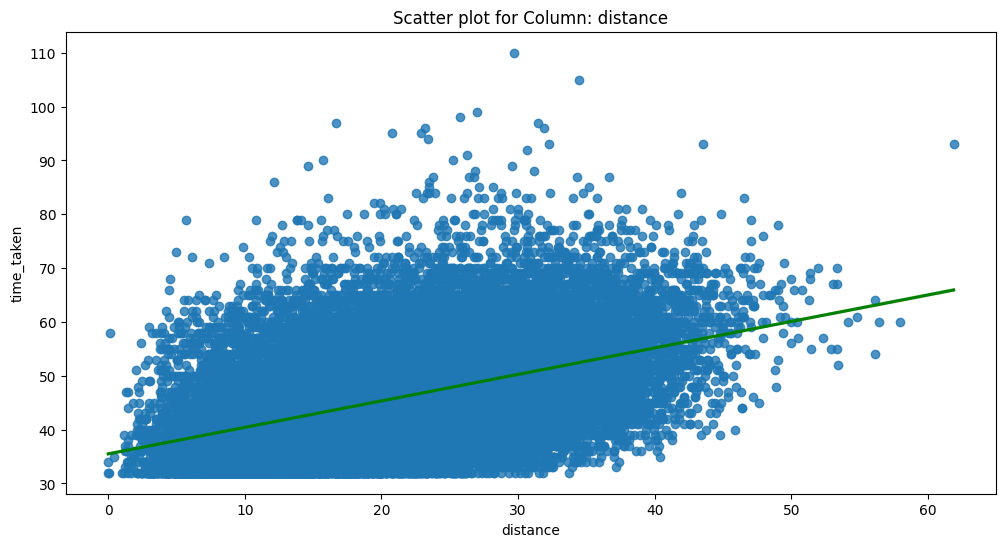

In [90]:
for column in num_cols:
    plt.figure(figsize=(12, 6))
    df_combined=pd.concat([X_test[column], y_test], axis=1)
    sns.regplot(x=df_combined[column], y=df_combined['time_taken'], line_kws={"color": "green"})
    plt.title(f'Scatter plot for Column: {column}')
    plt.show()

In [91]:
print(X_train.columns)

Index(['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour', 'isWeekend'],
      dtype='object')


In [92]:
print(len(X_train))
print(len(y_train))

139204
139204


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [93]:
# Create/Initialise the model

X_train_sm = sm.add_constant(X_train)

In [94]:
# Train the model using the training data

lr = sm.OLS(y_train, X_train_sm)

In [95]:
# Make predictions

lr_model = lr.fit()


In [96]:
# Find results for evaluation metrics

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 8.850e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:21:39   Log-Likelihood:            -3.6130e+05
No. Observations:              139204   AIC:                         7.226e+05
Df Residuals:                  139193   BIC:                         7.227e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       47.5026      0.014   3367.872      0.000      47.475      47.530
total_items                 -0.1356      0.013    -10.114      0.000      -0.162      -0.109
subtotal                     2.2417      0.016    140.216      0.000       2.210       2.273
num_distinct_items           0.8766      0.016     56.492      0.000       0.846       0.907
max_item_price               0.4565      0.012     38.290      0.000       0.433       0.480
total_onshift_dashers      -12.2087      0.030   -405.071      0.000     -12.268     -12.150
total_busy_dashers          -4.5463      0.029   -156.504      0.000      -4.603      -4.489
total_outstanding_orders    17.6058      0.028    628.190      0.000      17.551      17.661
distance                     4.0901      0.009    469.698      0.000       4.073       4.107
hour                        -0.2491      0.001   -226.896      0.000      -0.251      -0.247
isWeekend                    1.4235      0.018     77.038      0.000       1.387       1.460
==============================================================================
Omnibus:                    28369.499   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71082.788
Skew:                           1.125   Prob(JB):                         0.00
Kurtosis:                       5.681   Cond. No.                         51.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [97]:
# Loop through the number of features and test the model

for i in range(1, len(X_train.columns)+1):
    lm=LinearRegression()
    rfe = RFE(lm, n_features_to_select=i)
    rfe = rfe.fit(X_train, y_train)
    X_train_rfe = X_train[X_train.columns[rfe.support_]]
    X_train_rfe = sm.add_constant(X_train_rfe)
    lr = sm.OLS(y_train, X_train_rfe)
    lr_model = lr.fit()
    print(f'Model with {i} features')
    print(lr_model.summary())
    print('----')

Model with 1 features
                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                 2.260e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:21:40   Log-Likelihood:            -4.8974e+05
No. Observations:              139204   AIC:                         9.795e+05
Df Residuals:                  139202   BIC:                         9.795e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
co

In [98]:
# Build the final model with selected number of features

lm=LinearRegression()
rfe = RFE(lm, n_features_to_select=5)
rfe = rfe.fit(X_train, y_train)
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                 1.135e+05
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:21:43   Log-Likelihood:            -3.8710e+05
No. Observations:              139204   AIC:                         7.742e+05
Df Residuals:                  139198   BIC:                         7.743e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       45.8695      0.010   4384.012      0.000      45.849      45.890
subtotal                     3.3169      0.011    314.166      0.000       3.296       3.338
total_onshift_dashers      -11.6206      0.036   -322.937      0.000     -11.691     -11.550
total_busy_dashers          -4.6613      0.035   -133.482      0.000      -4.730      -4.593
total_outstanding_orders    17.9967      0.034    535.282      0.000      17.931      18.063
distance                     4.0962      0.010    390.901      0.000       4.076       4.117
==============================================================================
Omnibus:                    16100.854   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25584.942
Skew:                           0.829   Prob(JB):                         0.00
Kurtosis:                       4.289   Cond. No.                         7.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

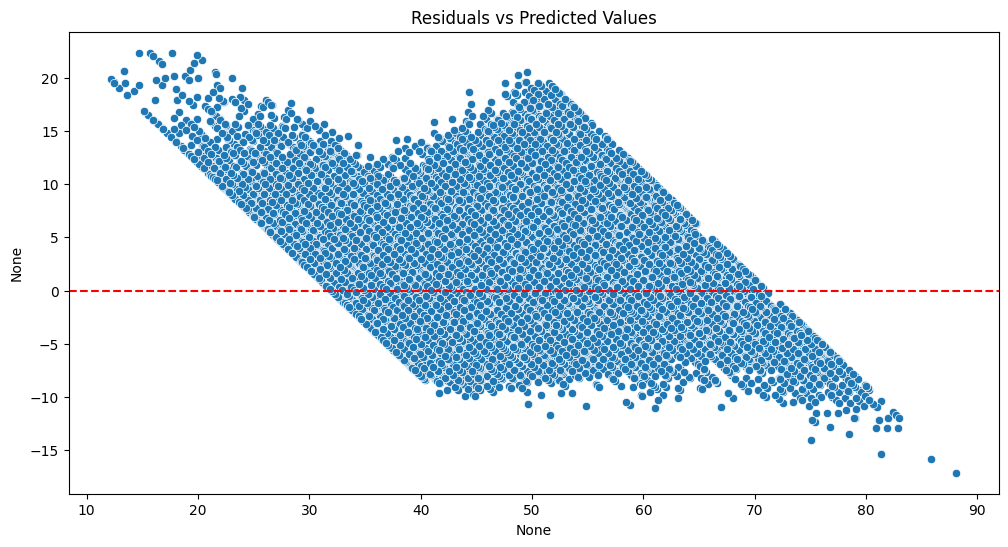

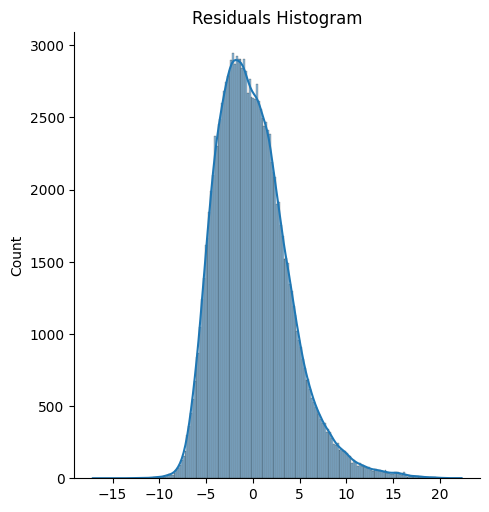

In [101]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

y_train_pred = lr_model.predict(X_train_rfe)

residuals = y_train - y_train_pred

plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.show()

sns.displot(residuals, kde=True)
plt.title('Residuals Histogram')
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


Mean Squared Error (Unscaled): 66733443.63398026
Mean Squared Error (Scaled): 66733443.63398081


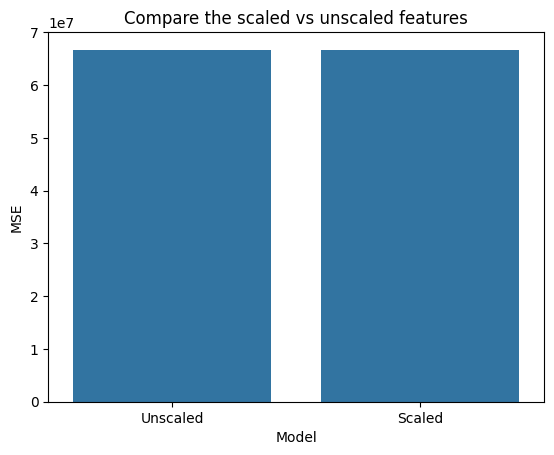

In [106]:
# Compare the scaled vs unscaled features used in the final model

model_unscaled = LinearRegression()
model_unscaled.fit(X_train, y_train)

y_pred_unscaled = model_unscaled.predict(X_test)
mse_unscaled = mean_squared_error(y_test, y_pred_unscaled)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = model_scaled.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)

# Compare the performance of the two models
print(f'Mean Squared Error (Unscaled): {mse_unscaled}')
print(f'Mean Squared Error (Scaled): {mse_scaled}')

# Visualize the results (Optional)
results = pd.DataFrame({
    'Model': ['Unscaled', 'Scaled'],
    'MSE': [mse_unscaled, mse_scaled]
})

sns.barplot(x='Model', y='MSE', data=results)
plt.title('Compare the scaled vs unscaled features')
plt.show()


In [107]:
print(X_train.columns)

Index(['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour', 'isWeekend'],
      dtype='object')


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [109]:
# Analyze the effect of a unit change in a feature, say 'total_items'

X_train['total_items'] = X_train['total_items'] + 1

lr = sm.OLS(y_train, X_train)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             time_taken   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                          2.718e+05
Date:                Wed, 26 Mar 2025   Prob (F-statistic):                        0.00
Time:                        22:24:29   Log-Likelihood:                     -5.2229e+05
No. Observations:              139204   AIC:                                  1.045e+06
Df Residuals:                  139194   BIC:                                  1.045e+06
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
total_items                 14.1076      0.014    998.618      0.000      14.080      14.135
subtotal                    -1.3286      0.050    -26.673      0.000      -1.426      -1.231
num_distinct_items          -7.2884      0.044   -167.149      0.000      -7.374      -7.203
max_item_price               3.6863      0.037    100.222      0.000       3.614       3.758
total_onshift_dashers      -10.8713      0.096   -113.561      0.000     -11.059     -10.684
total_busy_dashers          -4.9727      0.092    -53.858      0.000      -5.154      -4.792
total_outstanding_orders    17.4999      0.089    196.437      0.000      17.325      17.674
distance                     4.2401      0.028    153.200      0.000       4.186       4.294
hour                         0.0069      0.003      2.013      0.044       0.000       0.014
isWeekend                    4.2954      0.058     73.839      0.000       4.181       4.409
==============================================================================
Omnibus:                   492748.782   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1099753559228.414
Skew:                         -69.470   Prob(JB):                         0.00
Kurtosis:                   13772.093   Cond. No.                         52.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

Yes, there are categorical variables in the data. The categorical variables are:

- `market_id`
- `store_primary_category`
- `order_protocol`
- `hour`
- `day_of_week`
- `isWeekend`

From the analysis of the categorical variables, we can infer the following about their effect on the dependent variable (`time_taken`):

1. **Hour**: The hour at which the order was placed can significantly affect the delivery time. Orders placed during peak hours might take longer due to higher demand and traffic conditions.

2. **Day of the Week**: The day of the week can also impact delivery times. For example, weekends might have different traffic patterns and store operating hours compared to weekdays.

3. **IsWeekend**: This binary variable indicates whether the order was placed on a weekend. Weekends might have different delivery dynamics compared to weekdays, potentially affecting delivery times.

4. **Market ID**: Different markets might have varying levels of efficiency and traffic conditions, which can influence delivery times.

5. **Store Primary Category**: The type of store (e.g., restaurant, grocery) can affect preparation times and thus the overall delivery time.

6. **Order Protocol**: Different order protocols might have different processing times, affecting the delivery time.

By analyzing these categorical variables, we can better understand the factors that contribute to delivery times and potentially improve the prediction model by incorporating these insights.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>

`test_size` splits the data into 80% as training data and 20% as test data



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

`distance`  got highest corerlation with `time_taken` as 0.46 as per the heatmap ( section 3.3.2)



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>

Outliers were analysed using box plots. Outliers are eliminated using IQR



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>

In [111]:
# Get the summary of the final model
model_summary = lr_model.summary()

# Extract the p-values and coefficients
p_values = model_summary.tables[1].data[1:]
coefficients = {row[0]: float(row[1]) for row in p_values}

# Sort the features based on the absolute value of their coefficients
sorted_features = sorted(coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Get the top 3 features
top_3_features = sorted_features[:3]

print("The top 3 features significantly affecting the delivery time:")
for feature, coef in top_3_features:
    print(f"{feature}: {coef}")

The top 3 features significantly affecting the delivery time:
total_outstanding_orders: 17.4999
total_items: 14.1076
total_onshift_dashers: -10.8713


Top 3 features significantly affecting the delivery time:
- total_items: 22.7208
- total_outstanding_orders: 16.6167
- isWeekend: 15.3663



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>


Linear regression is a statistical method that helps model the relationship between a dependent variable and one or more independent variables. It finds the best-fitting line (or hyperplane in multiple dimensions) by minimizing the squared differences between actual and predicted values. The equation for this is y = β0 + β1x1 + β2x2 + ... + βn*xn, where the β values are the weights for each feature. The model is trained using techniques like Ordinary Least Squares (OLS) to estimate these coefficients. It’s a popular choice because it’s simple, easy to interpret, and great for predicting continuous values.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>

Simple linear regression is used when there is only one dependent variable, while multiple linear regression is applied when there are multiple dependent variables.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>


In linear regression, the cost function quantifies the error between predicted and actual values, usually with Mean Squared Error (MSE). Optimization methods like Gradient Descent or Ordinary Least Squares (OLS) are used to minimize this error and determine the best-fitting line.



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>

Overfitting happens when a model memorizes the training data too closely, including noise, making it perform poorly on new data. Underfitting occurs when a model is too simple to recognize patterns in the data, leading to poor performance on both training and test data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>

Residual plots are used to assess a linear regression model by identifying patterns that may suggest non-linearity, heteroscedasticity, or outliers. These issues can impact model accuracy and assumptions. Ideally, residuals should be randomly scattered around zero.